In [1]:
import sklearn
sklearn.__version__

'0.19.0'

# 1. End-to-End Machine Learning Project

## Get the data

### Take a quick look at the data structure

In [44]:
import pandas as pd
import numpy as np

#### diabetes dataset

In [82]:
diab = pd.read_csv('diabetes.csv') #index_col=0

In [84]:
diab.head()

,age,sex,bmi,map,tc,ldl,hdl,tch,ltg,glu,y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


In [85]:
diab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
age    442 non-null int64
sex    442 non-null int64
bmi    442 non-null float64
map    442 non-null float64
tc     442 non-null int64
ldl    442 non-null float64
hdl    442 non-null float64
tch    442 non-null float64
ltg    442 non-null float64
glu    442 non-null int64
y      442 non-null int64
dtypes: float64(6), int64(5)
memory usage: 38.1 KB


In [86]:
diab.describe()

,age,sex,bmi,map,tc,ldl,hdl,tch,ltg,glu,y
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,48.518100,1.468326,26.375792,94.647014,189.140271,115.439140,49.788462,4.070249,4.641411,91.260181,152.133484
std,13.109028,0.499561,4.418122,13.831283,34.608052,30.413081,12.934202,1.290450,0.522391,11.496335,77.093005
min,19.000000,1.000000,18.000000,62.000000,97.000000,41.600000,22.000000,2.000000,3.258100,58.000000,25.000000
25%,38.250000,1.000000,23.200000,84.000000,164.250000,96.050000,40.250000,3.000000,4.276700,83.250000,87.000000
50%,50.000000,1.000000,25.700000,93.000000,186.000000,113.000000,48.000000,4.000000,4.620050,91.000000,140.500000
75%,59.000000,2.000000,29.275000,105.000000,209.750000,134.500000,57.750000,5.000000,4.997200,98.000000,211.500000
max,79.000000,2.000000,42.200000,133.000000,301.000000,242.400000,99.000000,9.090000,6.107000,124.000000,346.000000


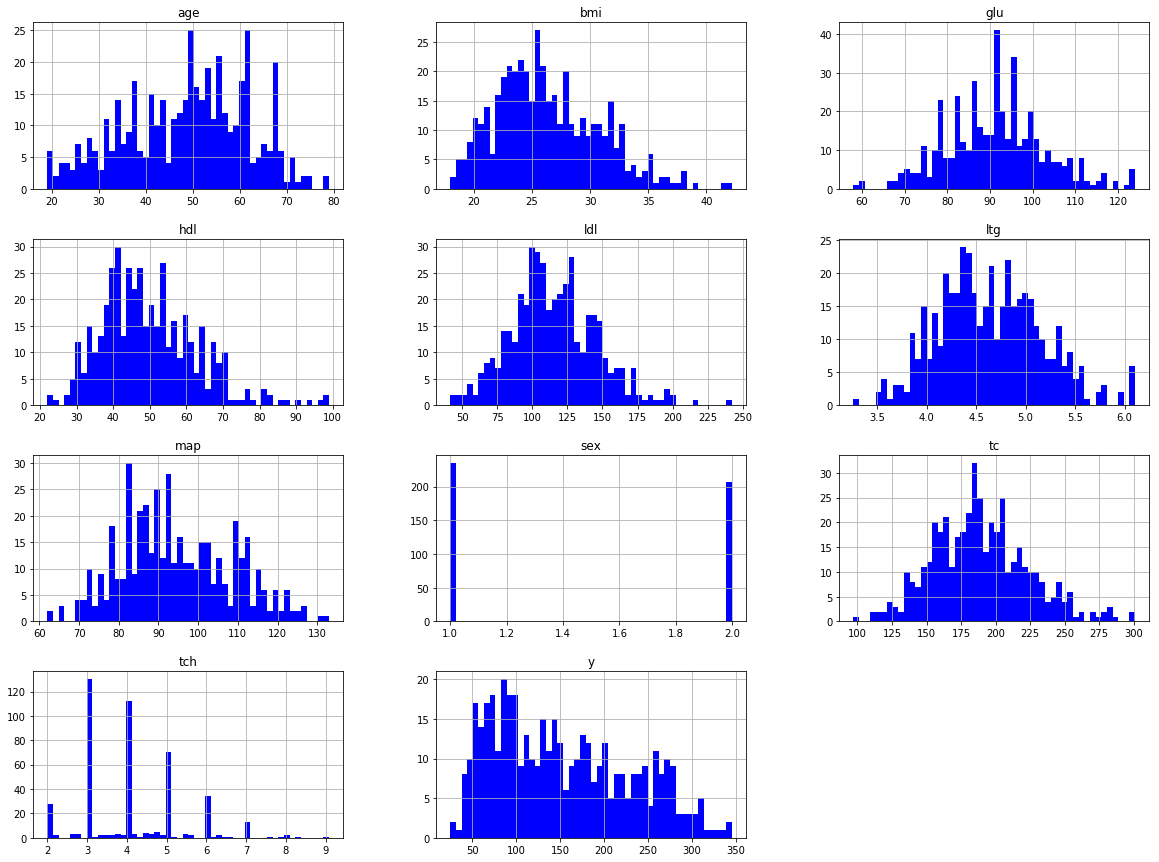

In [90]:
%matplotlib inline

import matplotlib.pyplot as plt

diab.hist(bins=50, figsize=(20,15), color='blue')

plt.show()

### Looking for correlation

In [101]:
corr_matrix = diab.corr()

In [102]:
corr_matrix

,age,sex,bmi,map,tc,ldl,hdl,tch,ltg,glu,y
age,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680,0.586450
map,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430,0.441482
tc,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717,0.212022
ldl,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600,0.174054
hdl,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
tch,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212,0.430453
ltg,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669,0.565883
glu,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000,0.382483


In [103]:
corr_matrix['y'].sort_values(ascending=False)

y      1.000000
bmi    0.586450
ltg    0.565883
map    0.441482
tch    0.430453
glu    0.382483
tc     0.212022
age    0.187889
ldl    0.174054
sex    0.043062
hdl   -0.394789
Name: y, dtype: float64

/home/ruidong/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  


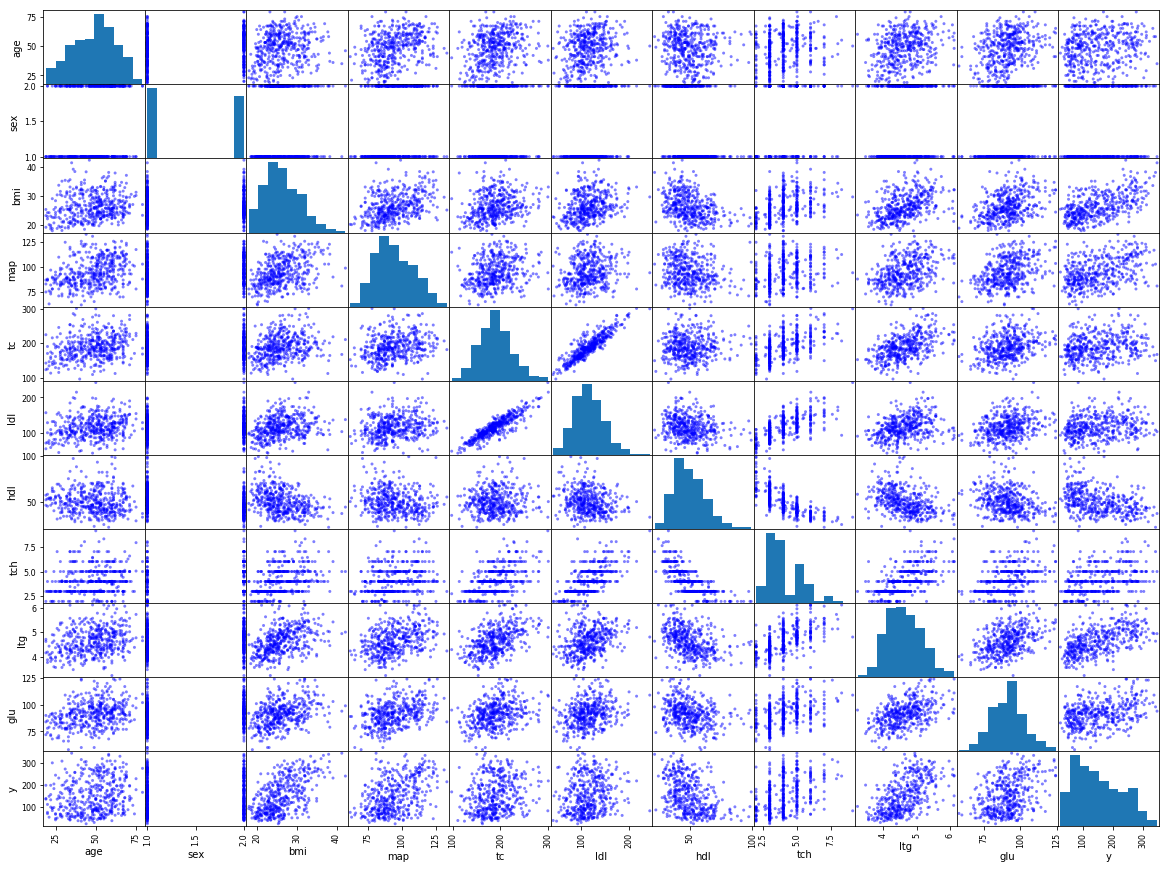

In [111]:
from pandas import scatter_matrix
scatter_matrix(diab, figsize=(20,15), color='blue');

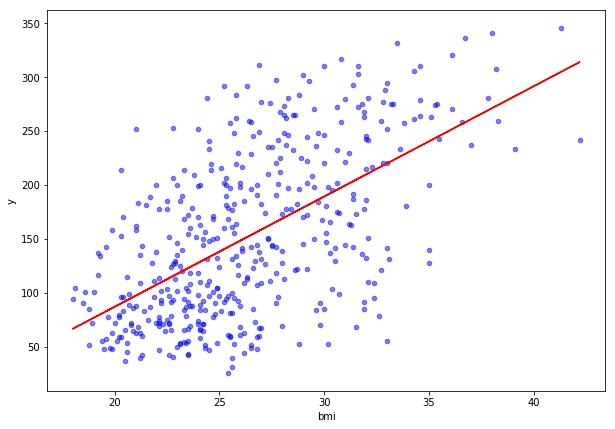

In [110]:
diab.plot(kind='scatter', x='bmi', y='y', alpha=0.5, figsize=(10,7), color='blue')

x = diab['bmi']
y = diab['y']

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x), 'b', color='red')


### Discover and Visualize the Data to Gain Insights

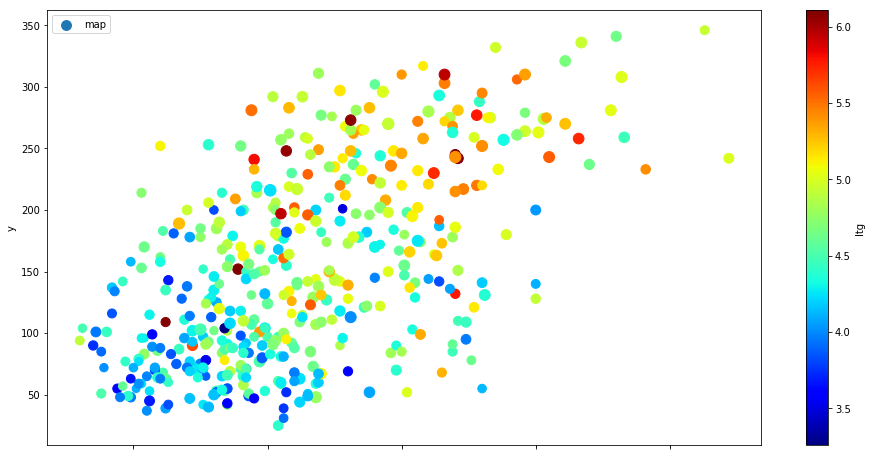

In [119]:
diab.plot(kind='scatter', x='bmi', y='y', s=diab['map'], c='ltg',
        cmap=plt.get_cmap('jet'), colorbar=True, label='map', figsize=(16,8))

plt.legend()

#### breast cancer dataset

In [91]:
from sklearn.datasets import load_breast_cancer # classification
#from sklearn.datasets import load_diabetes # regression, centered
brca = load_breast_cancer()
#diab = load_diabetes()

In [92]:
list(brca.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names']

In [93]:
brca.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [94]:
brca.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [95]:
brca = pd.DataFrame(np.c_[brca['data'], brca['target']],
                   columns = np.append(brca['feature_names'], ['target']))

In [96]:
brca.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [97]:
brca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

In [98]:
brca.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [99]:
brca['target'].value_counts()

1.0    357
0.0    212
Name: target, dtype: int64

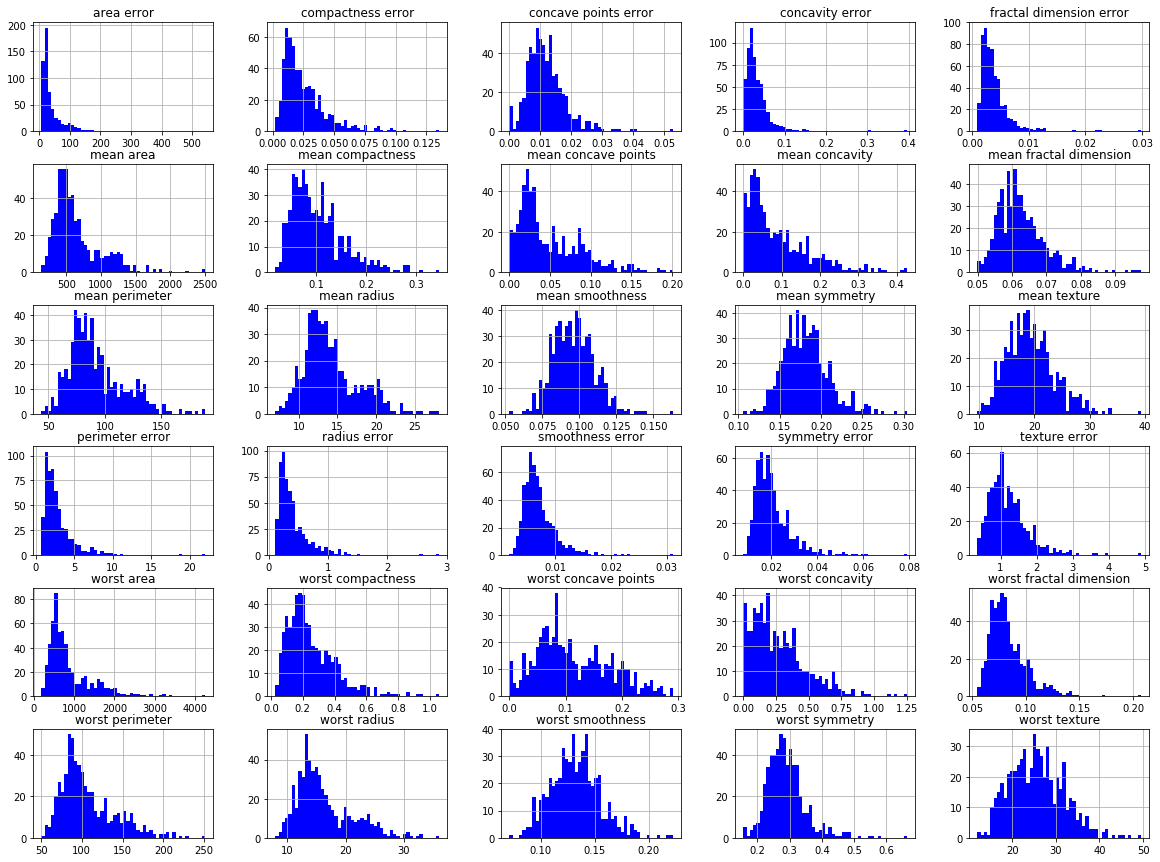

In [100]:
%matplotlib inline

import matplotlib.pyplot as plt

brca.drop('target', axis=1).hist(bins=50, figsize=(20,15), color='blue')

plt.show()

## Experimenting with Attribute Combinations

## Prepare the Data for Machine Learning Algorithms

### Data Cleaning

Most Machine Learning algorithms cannot work with missing features. You have three options:
* Get rid of the corresponding instances
* Get rid of the whole attribute
* Set the values to some value

In [121]:
diab.shape

(442, 11)

In [120]:
diab1 = diab.dropna(subset=['bmi'])
diab1.shape

(442, 11)

In [123]:
diab2 = diab.drop('bmi', axis=1)
diab2.shape

(442, 10)

In [124]:
median = diab['bmi'].median()
diab['bmi'].fillna(median, inplace=True)

In [129]:
diab_num = diab.drop(['sex','y'], axis=1)


from sklearn.preprocessing import Imputer
imputer = Imputer(strategy='median')
imputer.fit(diab_num)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

In [130]:
imputer.statistics_

array([ 50.     ,  25.7    ,  93.     , 186.     , 113.     ,  48.     ,
         4.     ,   4.62005,  91.     ])

In [131]:
diab_num.median().values

array([ 50.     ,  25.7    ,  93.     , 186.     , 113.     ,  48.     ,
         4.     ,   4.62005,  91.     ])

In [132]:
X = imputer.transform(diab_num)

In [133]:
X

array([[ 59.    ,  32.1   , 101.    , ...,   4.    ,   4.8598,  87.    ],
       [ 48.    ,  21.6   ,  87.    , ...,   3.    ,   3.8918,  69.    ],
       [ 72.    ,  30.5   ,  93.    , ...,   4.    ,   4.6728,  85.    ],
       ...,
       [ 60.    ,  24.9   ,  99.67  , ...,   3.77  ,   4.1271,  95.    ],
       [ 36.    ,  30.    ,  95.    , ...,   4.79  ,   5.1299,  85.    ],
       [ 36.    ,  19.6   ,  71.    , ...,   3.    ,   4.5951,  92.    ]])

In [134]:
diab_num_tr = pd.DataFrame(X, columns=diab_num.columns)

In [135]:
diab_num_tr.head()

,age,bmi,map,tc,ldl,hdl,tch,ltg,glu
0,59.0,32.1,101.0,157.0,93.2,38.0,4.0,4.8598,87.0
1,48.0,21.6,87.0,183.0,103.2,70.0,3.0,3.8918,69.0
2,72.0,30.5,93.0,156.0,93.6,41.0,4.0,4.6728,85.0
3,24.0,25.3,84.0,198.0,131.4,40.0,5.0,4.8903,89.0
4,50.0,23.0,101.0,192.0,125.4,52.0,4.0,4.2905,80.0


#### Handling Text and Categorical Attributes

In [136]:
diab_sex = diab['sex']
diab_sex.head(10)

0    2
1    1
2    2
3    1
4    1
5    1
6    2
7    2
8    2
9    1
Name: sex, dtype: int64

In [137]:
diab_sex_encoded, diab_sex_categories = diab_sex.factorize()

In [139]:
diab_sex_encoded

array([0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,

In [140]:
diab_sex_categories

Int64Index([2, 1], dtype='int64')

In [143]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
phe_cat_1hot = encoder.fit_transform(diab_sex_encoded.reshape(-1,1))
phe_cat_1hot.toarray()

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.

In [145]:
encoder = OneHotEncoder(sparse=False)
phe_cat_1hot = encoder.fit_transform(diab_sex_encoded.reshape(-1,1))
phe_cat_1hot

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.

In [ ]:
from future_encoders import OneHotEncoder
cat_encoder = OneHotEncoder(sparse=False)
phe_cat_1hot = cat_encoder.fit_transform(phe_t)
phe_cat_1hot

### Transformation Pipelines

In [149]:
from sklearn.base import BaseEstimator, TransformerMixin

# Create a class to select numerical or categorical columns 
# since Scikit-Learn doesn't handle DataFrames yet
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [168]:
num_attribs = list(diab_num)
cat_attribs = ["sex"]

In [147]:
num_attribs

['age', 'bmi', 'map', 'tc', 'ldl', 'hdl', 'tch', 'ltg', 'glu']

In [150]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attribs)),
        ('imputer', Imputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

diab_num_tr = num_pipeline.fit_transform(diab_num)
diab_num_tr

array([[ 0.80050009,  1.29708846,  0.45984057, ..., -0.05449919,
         0.41853093, -0.37098854],
       [-0.03956713, -1.08218016, -0.55350458, ..., -0.83030083,
        -1.43658851, -1.93847913],
       [ 1.79330681,  0.93453324, -0.1192138 , ..., -0.05449919,
         0.06015558, -0.54515416],
       ...,
       [ 0.87686984, -0.33441002,  0.36357278, ..., -0.23293356,
        -0.98564884,  0.32567395],
       [-0.9560041 ,  0.82123474,  0.02554979, ...,  0.55838411,
         0.93616291, -0.54515416],
       [-0.9560041 , -1.53537419, -1.71161333, ..., -0.83030083,
        -0.08875225,  0.06442552]])

In [151]:
cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_attribs)),
        ('cat_encoder', OneHotEncoder(sparse=False)),
    ])

In [152]:
from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])

In [154]:
diab_prepared = full_pipeline.fit_transform(diab)
diab_prepared

array([[ 0.80050009,  1.29708846,  0.45984057, ..., -0.37098854,
         0.        ,  1.        ],
       [-0.03956713, -1.08218016, -0.55350458, ..., -1.93847913,
         1.        ,  0.        ],
       [ 1.79330681,  0.93453324, -0.1192138 , ..., -0.54515416,
         0.        ,  1.        ],
       ...,
       [ 0.87686984, -0.33441002,  0.36357278, ...,  0.32567395,
         0.        ,  1.        ],
       [-0.9560041 ,  0.82123474,  0.02554979, ..., -0.54515416,
         1.        ,  0.        ],
       [-0.9560041 , -1.53537419, -1.71161333, ...,  0.06442552,
         1.        ,  0.        ]])

In [155]:
diab_prepared.shape

(442, 11)

In [157]:
diab_target = diab['y']
diab_target[:5]

0    151
1     75
2    141
3    206
4    135
Name: y, dtype: int64

## Select and Train a Model

### Training and Evaluating on the Training Set

In [158]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(diab_prepared, diab_target)

/home/ruidong/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [162]:
lin_pred = lin_reg.predict(diab_prepared)

In [169]:
for feature, coef in zip(num_attribs+['sex0','sex1'], lin_reg.coef_):
    print (feature, coef)

age -0.47612078617922715
bmi 24.7265488604021
map 15.429404131395522
tc -37.67995261101588
ldl 22.676162766290204
hdl 4.8061381368978715
tch 8.422039355820882
ltg 35.734445771331096
glu 3.216673718190483
sex0 11.42982404524918
sex1 -11.429824045249198


In [163]:
from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(diab_target, lin_pred)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

53.47612876402657

In [170]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(diab_prepared, diab_target)

/home/ruidong/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [173]:
tree_pred = tree_reg.predict(diab_prepared)

In [176]:
tree_pred[:10]

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310.])

In [177]:
diab_target[:10]

0    151
1     75
2    141
3    206
4    135
5     97
6    138
7     63
8    110
9    310
Name: y, dtype: int64

In [179]:
from sklearn.metrics import mean_squared_error
tree_mse = mean_squared_error(tree_pred, diab_target)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

### Better Evaluation Using Cross-Validation

In [181]:
from sklearn.model_selection import cross_val_score

In [182]:
scores = cross_val_score(tree_reg, diab_prepared, diab_target, scoring='neg_mean_squared_error', cv=10)
scores

array([-8534.46666667, -6587.2       , -5066.38636364, -7569.04545455,
       -5472.75      , -6197.40909091, -5761.5       , -6647.04545455,
       -8683.15909091, -5122.97727273])

In [183]:
tree_rmse_scores = np.sqrt(-scores)
tree_rmse_scores

array([92.38217721, 81.16156726, 71.17855269, 87.00026123, 73.97803728,
       78.72362473, 75.90454532, 81.52941466, 93.18347005, 71.57497658])

In [184]:
tree_rmse_scores.mean()

80.66166270234265

In [185]:
tree_rmse_scores.std()

7.608555019676547

In [186]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(random_state=77)
forest_reg.fit(diab_prepared, diab_target) # optional for cv

/home/ruidong/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=77, verbose=0, warm_start=False)

In [187]:
scores = cross_val_score(forest_reg, diab_prepared, diab_target, scoring='neg_mean_squared_error', cv=10)
scores

array([-3846.38      , -3433.14666667, -3357.01840909, -3415.11863636,
       -2926.81840909, -3549.85590909, -3585.51454545, -4001.10022727,
       -5297.24431818, -3305.63818182])

In [188]:
forest_rmse_scores = np.sqrt(-scores)
forest_rmse_scores

array([62.01919058, 58.59305988, 57.93978261, 58.43901639, 54.10007772,
       59.58066724, 59.87916621, 63.25425067, 72.78217033, 57.4946796 ])

In [189]:
forest_rmse_scores.mean()   ### better than decision tree

60.408206122179294

In [190]:
forest_rmse_scores.std()

4.757327338257293

In [191]:
from sklearn.model_selection import cross_val_predict
forest_pred = cross_val_predict(forest_reg, diab_prepared, diab_target, cv=10)
forest_pred

array([205.4,  90.6, 161.6, 215.7,  71.7, 101.3,  52.9, 186.1, 141. ,
       109.2, 100.5, 141. ,  84.9, 203.6, 102.3, 202.8, 190.5, 213.4,
       124.6, 105.2, 113.7,  77.4,  74.3, 232.2, 136.8, 155.1,  89.8,
       145.1, 157.3, 212.6, 150. ,  73.7, 252.7, 115.1,  70.5, 122.3,
       212.1, 155.7, 241.1, 169.3, 190.5, 112.6, 133.6,  90.7, 176.9,
       127.6, 116.8, 135.9,  82.4, 198.8, 100. , 213.2, 140.2, 119.2,
       123.5,  81.6, 208. ,  98.2, 108.1, 141.5,  95.3, 161.7,  70.9,
       136. , 130.8, 177.5, 143.4, 120.3, 106. ,  90.6,  83.4, 241. ,
       181.7, 141.4, 166.1, 108.6, 191.8,  55.4, 161.6, 100. , 222.3,
       141.6,  85.6, 127.3,  66.4, 115.1,  89. , 192.3,  92.1,  83.6,
        81.3, 163.2, 192.1,  80.1,  99. , 139.6, 198.6, 219.5, 121.8,
       118. , 197.4, 105.2, 146.8, 171.8, 149.2, 111.5, 107.5, 136.1,
       204.2, 123.8,  64.4, 109.1, 157.3, 234.8, 279.6, 182.2, 265.8,
       191. , 204.7, 174.3,  74.6, 194. , 242.3, 212.8, 163.1, 184.9,
        83.1, 143.4,

In [192]:
forest_cor = str(round(np.corrcoef(x=diab_target, y=forest_pred)[0][1],3))
forest_cor

'0.626'

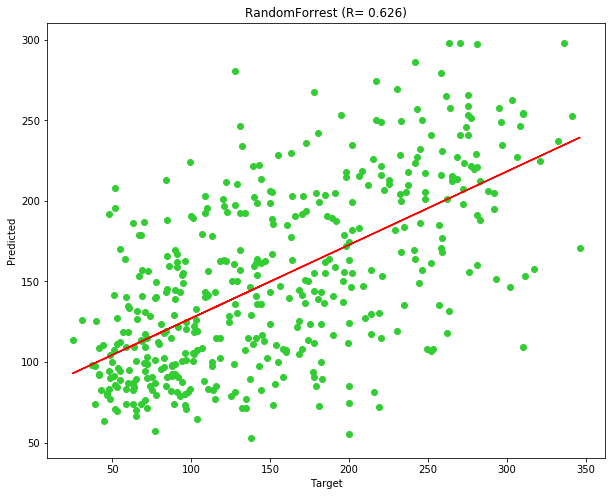

In [196]:
plt.figure(figsize=(10,8))

plt.scatter(x=diab_target, y=forest_pred, color='limegreen')
plt.title('RandomForrest' + ' (R= ' + forest_cor + ')')
plt.xlabel('Target')
plt.ylabel('Predicted')

z = np.polyfit(diab_target, forest_pred, 1)
p = np.poly1d(z)
plt.plot(diab_target,p(diab_target), 'b', color='red') # r--

In [197]:
tree_pred = cross_val_predict(tree_reg, diab_prepared, diab_target, cv=10)
tree_pred

array([174., 143., 174., 292., 104., 114.,  47., 230., 167.,  55., 113.,
       235.,  49., 142.,  91., 233., 198., 163., 183.,  52.,  69., 118.,
       168., 132., 103.,  93.,  77., 155.,  88., 189., 187.,  59., 288.,
        65., 127., 214., 283., 142., 215., 182., 311., 152.,  47.,  98.,
       174.,  63., 131., 140.,  81., 202.,  25., 121.,  63., 135., 118.,
        39., 310.,  55.,  64., 200.,  42.,  48.,  39., 183., 219., 189.,
       174.,  83.,  83.,  67.,  39., 297., 196., 107., 311., 154.,  52.,
        49., 156.,  68., 219., 118., 125., 182., 125., 191.,  99., 220.,
       104.,  69.,  84., 180., 109.,  59.,  97.,  93., 235., 237.,  60.,
       214., 242.,  45., 129., 244., 136.,  64., 113., 140., 281.,  89.,
        63., 113., 147., 235., 275., 233., 151., 152., 206.,  86.,  60.,
       232., 233., 150., 175., 283.,  85., 235.,  89., 242., 321., 113.,
       111.,  55., 184., 259.,  48.,  52., 274., 215., 127., 192., 242.,
        59., 180., 257., 132., 332., 187., 208., 26

In [198]:
tree_cor = str(round(np.corrcoef(x=diab_target, y=tree_pred)[0][1],3))
tree_cor

'0.418'

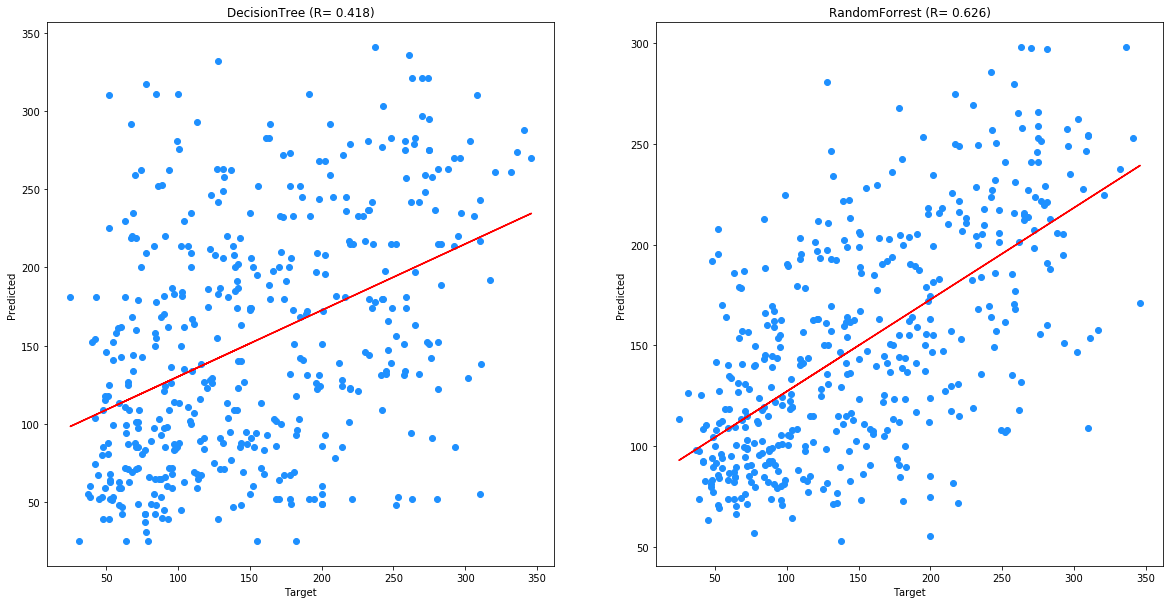

In [200]:
plt.figure(figsize=(20,10))

###
plt.subplot(1,2,1)
plt.scatter(x=diab_target, y=tree_pred, color='dodgerblue')
plt.title('DecisionTree' + ' (R= ' + tree_cor + ')')
plt.xlabel('Target')
plt.ylabel('Predicted')

z = np.polyfit(diab_target, tree_pred, 1)
p = np.poly1d(z)
plt.plot(diab_target,p(diab_target), 'b', color='red') # r--

###
plt.subplot(1,2,2)
plt.scatter(x=diab_target, y=forest_pred, color='dodgerblue')
plt.title('RandomForrest' + ' (R= ' + forest_cor + ')')
plt.xlabel('Target')
plt.ylabel('Predicted')

z = np.polyfit(diab_target, forest_pred, 1)
p = np.poly1d(z)
plt.plot(diab_target,p(diab_target), 'b', color='red') # r--

### Possible sulotions for overfitting
* simplify the model
* constrain it
* get a lot more training data

### Save Scikit-Learn models by pickle module

In [201]:
from sklearn.externals import joblib
joblib.dump(forest_reg, 'forest_reg.pkl')

['forest_reg.pkl']

In [202]:
my_model = joblib.load('forest_reg.pkl')
my_model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=77, verbose=0, warm_start=False)

## Fine-Tune Your Model

### Grid Search

In [203]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(diab_prepared, diab_target)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [204]:
grid_search.best_params_

{'max_features': 4, 'n_estimators': 30}

In [205]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [30,50,100], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    #{'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(diab_prepared, diab_target)
grid_search.best_params_

{'max_features': 2, 'n_estimators': 50}

In [206]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=2, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=50, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [207]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print (np.sqrt(-mean_score), params)

57.589847917906866 {'max_features': 2, 'n_estimators': 30}
56.581181112703874 {'max_features': 2, 'n_estimators': 50}
56.85986733097367 {'max_features': 2, 'n_estimators': 100}
57.47756230414043 {'max_features': 4, 'n_estimators': 30}
57.64813555555526 {'max_features': 4, 'n_estimators': 50}
57.00626054767107 {'max_features': 4, 'n_estimators': 100}
58.00524187058059 {'max_features': 6, 'n_estimators': 30}
57.48943935284178 {'max_features': 6, 'n_estimators': 50}
57.54978827932797 {'max_features': 6, 'n_estimators': 100}
58.04789734455228 {'max_features': 8, 'n_estimators': 30}
57.64402854719057 {'max_features': 8, 'n_estimators': 50}
57.681356545996955 {'max_features': 8, 'n_estimators': 100}


### Randomized Search
When the hyperparameter search space is large, it is often preferable to use RandomizedSearchCV instead. It evaluates a given number of random combinations by selecting a random value for each hyperparameter at every iteration

### Ensemble Methods
Another way to fine-tune your system is to try to combine the models that perform best. The group('ensemble') will often perform better than the best individual model

In [208]:
#### Analyze the best models and their errors
feature_importance = grid_search.best_estimator_.feature_importances_
feature_importance

array([0.06183293, 0.18527062, 0.11514216, 0.07175553, 0.07301619,
       0.10102066, 0.0775892 , 0.19029453, 0.10084611, 0.01158505,
       0.01164703])

In [210]:
sorted(zip(feature_importance, num_attribs+['sex0','sex1']), reverse=True)

[(0.19029453371253077, 'ltg'),
 (0.18527062036361377, 'bmi'),
 (0.11514215805487713, 'map'),
 (0.10102065816426176, 'hdl'),
 (0.10084610601361697, 'glu'),
 (0.07758919812231566, 'tch'),
 (0.07301618621063824, 'ldl'),
 (0.07175553021103544, 'tc'),
 (0.061832934148827866, 'age'),
 (0.011647026784433074, 'sex1'),
 (0.011585048213849314, 'sex0')]

## Evaluate your system on test set

# 2. Classification

In [214]:
brca_num = brca.drop(['target'], axis=1)
brca_num.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [218]:
num_attribs = list(brca_num.keys())

In [222]:
num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attribs)),
        ('imputer', Imputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

brca_prepared = num_pipeline.fit_transform(brca_num)
brca_prepared

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [223]:
brca_prepared.shape

(569, 30)

In [225]:
brca_target = brca['target'].astype(np.int)
brca_target.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [211]:
import numpy as np

def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data)*test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    
    return (data.iloc[train_indices], data.iloc[test_indices])

In [226]:
test_ratio = 1/3
n_instances = len(brca_prepared)


shuffled_indices = np.random.permutation(n_instances)
test_set_size = int(n_instances*test_ratio)

In [227]:
test_set_size

189

In [228]:
test_indices = shuffled_indices[:test_set_size]
train_indices = shuffled_indices[test_set_size:]

In [333]:
#train_rna = rna.iloc[train_indices]
#test_rna = rna.iloc[test_indices]

brca_train = brca_prepared[train_indices]
brca_test = brca_prepared[test_indices]

In [230]:
brca_train.shape

(380, 30)

In [334]:
brca_target_train = brca_target.iloc[train_indices]
brca_target_test = brca_target.iloc[test_indices]

In [335]:
brca_target_train.head()

359    1
48     1
155    1
158    1
343    0
Name: target, dtype: int64

In [362]:
test_ratio = 1/3
n_instances = len(diab_prepared)


shuffled_indices = np.random.permutation(n_instances)
test_set_size = int(n_instances*test_ratio)

test_indices = shuffled_indices[:test_set_size]
train_indices = shuffled_indices[test_set_size:]

diab_train = diab_prepared[train_indices]
diab_test = diab_prepared[test_indices]

diab_target_train = diab_target.iloc[train_indices]
diab_target_test = diab_target.iloc[test_indices]

In [363]:
diab_train.shape

(295, 11)

## Training a binary classifier

### Stochastic Gradient Descent (SGD)
SGD has the advantage of being capable of handling very large datasets efficiently. This is in part because SGD deals with training instances independently, one at a time (which also makes SGD well suited for online learning)

In [234]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=77)
sgd_clf.fit(brca_train, brca_target_train)

/home/ruidong/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=77, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [235]:
sgd_clf.predict(brca_test)

array([0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1])

In [236]:
brca_target_test.head()

91     0
498    0
102    1
148    1
47     0
Name: target, dtype: int64

## Performance Measures

### Implementing Cross-Validation

In [237]:
from sklearn.model_selection import StratifiedKFold
skfolds = StratifiedKFold(n_splits=10, random_state=77, shuffle=True)
skfolds

StratifiedKFold(n_splits=10, random_state=77, shuffle=True)

In [238]:
for train_index, test_index in skfolds.split(brca_train, brca_target_train):
    print (train_index, test_index)
    #break

[  0   1   2   3   4   5   6   7   8   9  11  12  13  14  15  16  17  18
  19  20  21  23  24  25  26  27  28  29  30  31  32  35  37  38  39  40
  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58
  59  60  61  62  63  64  65  67  68  69  71  72  73  74  75  76  77  78
  79  80  81  82  83  84  85  86  88  89  90  91  92  94  95  96  97  98
  99 100 101 102 103 104 105 106 107 108 109 111 112 113 115 116 117 118
 119 120 121 122 123 124 125 127 128 130 131 132 133 134 135 136 137 138
 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158
 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 175 176 177
 178 180 183 184 185 186 187 188 189 190 192 193 194 195 196 197 198 201
 202 203 204 205 206 207 208 209 210 212 213 214 215 216 217 218 219 220
 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238
 240 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258
 259 261 262 263 264 265 266 267 268 269 270 271 27

In [240]:
import warnings
warnings.filterwarnings('ignore')

cross_val_score(sgd_clf, brca_train, brca_target_train, cv=10, scoring='accuracy') # u_correct/total

array([0.94871795, 0.94871795, 1.        , 1.        , 0.97368421,
       0.97368421, 1.        , 0.91891892, 1.        , 0.91891892])

* Accuracy is generally not the preferred prformance measure for classifier, especially when you are dealing with skewed datasets (i.e., when some classes are much more frequent than others)

* A much better way to evaluate the performance of a classifier is to look at the confusion matrix

In [248]:
brca_train_pred = cross_val_predict(sgd_clf, brca_train, brca_target_train, cv=10)
brca_train_pred

array([1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,

In [253]:
from sklearn.metrics import confusion_matrix
confusion_matrix(brca_target_train, brca_train_pred)

array([[148,   6],
       [  6, 220]])

In [250]:
############ Predicted    
           ## TN FP
# Actual            
           ## FN TP
    
    
### Precision = TP/(TP+FP) in the predicted positives, what percent are true

### Recall = TP/(TP+FN) in the actual positives, what percent are predicted true

In [251]:
from sklearn.metrics import precision_score, recall_score

precision_score(brca_target_train, brca_train_pred)

0.9734513274336283

In [254]:
recall_score(brca_target_train, brca_train_pred)

0.9734513274336283

* It is often convenient to combinbe precision and recall into a single metric called the F1 score.
* F1 score favors classifiers that have similar precision and recall

In [ ]:
### F1 = 2/(1/precision+1/recall) = 2* precision*recall/(precision+recall)

In [247]:
from sklearn.metrics import f1_score
f1_score(brca_target_train, brca_train_pred)

0.9734513274336283

### Precision/Recall Tradeoff
* For each instance, it computes a score based on a decision function, and if that score is greater than a threshold, it assigns the instance to the positive class, or else it assigns it to the negative class.

In [259]:
y_scores = sgd_clf.decision_function(brca_train)
y_scores[:5] # threshold = 0

array([ 103.2304204 ,  128.41692314,  151.79244592,  188.86457046,
       -261.0716661 ])

In [261]:
y_scores = cross_val_predict(sgd_clf, brca_train, brca_target_train, cv=10, method='decision_function')
y_scores[:5]

array([ 101.23792469,   70.36190836,   88.0807354 ,  144.15195237,
       -247.34982017])

In [264]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(brca_target_train, y_scores)

In [266]:
precisions[:5]

array([0.94560669, 0.94537815, 0.94936709, 0.94915254, 0.95319149])

In [269]:
recalls[:5]

array([1.        , 0.99557522, 0.99557522, 0.99115044, 0.99115044])

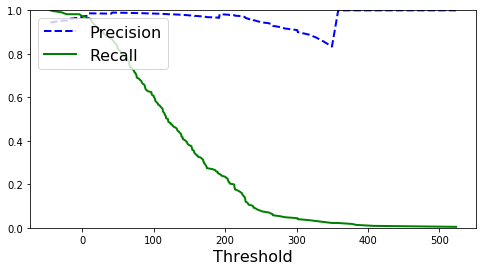

In [267]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.xlabel("Threshold", fontsize=16)
    plt.legend(loc="upper left", fontsize=16)
    plt.ylim([0, 1])

plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
#plt.xlim([-700000, 700000])
#save_fig("precision_recall_vs_threshold_plot")
plt.show()

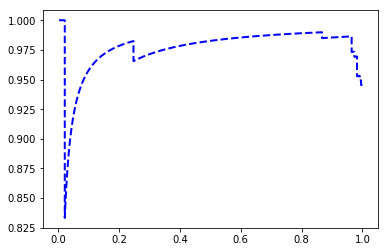

In [268]:
plt.plot(recalls, precisions, "b--", linewidth=2)

### ROC curve

In [270]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(brca_target_train, y_scores)

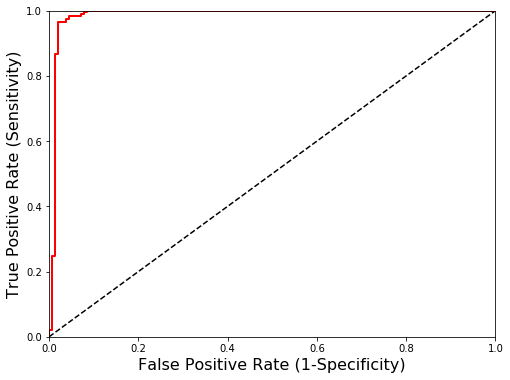

In [283]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label, color='red')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (1-Specificity)', fontsize=16)
    plt.ylabel('True Positive Rate (Sensitivity)', fontsize=16)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
#save_fig("roc_curve_plot")
plt.show()

In [273]:
from sklearn.metrics import roc_auc_score
roc_auc_score(brca_target_train, y_scores)

0.9864958050798759

* Some classifiers, such as RandomForrestClassifier, does not have a decision_function() method, instead, it has a predict_proba() method

In [274]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=77)
y_probas_forest = cross_val_predict(forest_clf, brca_train, brca_target_train, cv=10, method='predict_proba')

In [275]:
y_probas_forest

array([[0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.9, 0.1],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [1. , 0. ],
       [0.3, 0.7],
       [0. , 1. ],
       [0. , 1. ],
       [0.1, 0.9],
       [0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [1. , 0. ],
       [0.1, 0.9],
       [0. , 1. ],
       [0.2, 0.8],
       [0.2, 0.8],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [0.6, 0.4],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0.9, 0.1],
       [0.1, 0.9],
       [0.1, 0.9],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0.2, 0.8],
       [0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       [0.5, 0.5],
       [0.1,

In [276]:
y_scores_forest = y_probas_forest[:,1]

In [277]:
y_scores_forest

array([1. , 1. , 1. , 1. , 0. , 0. , 1. , 0. , 0. , 0. , 0.1, 0. , 1. ,
       1. , 0. , 0.7, 1. , 1. , 0.9, 1. , 0. , 1. , 1. , 0. , 0.9, 1. ,
       0.8, 0.8, 0. , 0. , 0. , 1. , 0. , 0. , 1. , 1. , 0.4, 0. , 1. ,
       1. , 1. , 0.1, 0.9, 0.9, 1. , 1. , 1. , 0.8, 1. , 0. , 1. , 0.5,
       0.9, 0.8, 1. , 0.1, 0. , 0.1, 1. , 0. , 0.8, 0.3, 1. , 1. , 0. ,
       0.1, 0.1, 0. , 1. , 0. , 1. , 0. , 0.3, 1. , 1. , 1. , 0. , 0. ,
       1. , 1. , 1. , 1. , 1. , 0. , 0. , 0. , 0. , 1. , 1. , 0. , 1. ,
       0. , 0. , 1. , 0.9, 0.1, 1. , 1. , 1. , 0.9, 1. , 0.9, 0. , 0. ,
       1. , 0.8, 1. , 0.7, 0. , 0. , 0.9, 1. , 1. , 1. , 1. , 0. , 0.9,
       0. , 1. , 0. , 1. , 0. , 0.9, 1. , 1. , 0. , 0.1, 0. , 1. , 1. ,
       1. , 1. , 0.2, 1. , 1. , 0. , 1. , 1. , 1. , 0.9, 1. , 0.9, 1. ,
       1. , 0. , 1. , 1. , 0.1, 0.2, 0.9, 0.1, 1. , 1. , 1. , 0.1, 0.1,
       0.9, 0. , 1. , 1. , 1. , 1. , 1. , 1. , 0.4, 1. , 0.2, 1. , 1. ,
       1. , 1. , 0.8, 0. , 1. , 0.9, 0. , 0. , 0. , 1. , 0.1, 0.

In [278]:
fpr_forest, tpr_forest, thresholds_forest = roc_curve(brca_target_train, y_scores_forest)

In [280]:
roc_auc_score(brca_target_train, y_scores_forest)

0.984197218710493

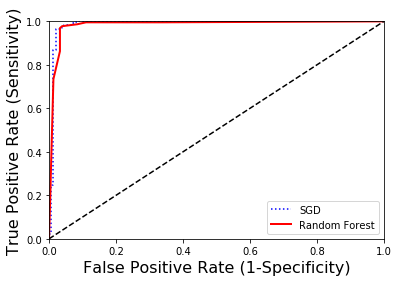

In [281]:
plt.plot(fpr, tpr, 'b:', label='SGD')
plot_roc_curve(fpr_forest, tpr_forest, 'Random Forest')
plt.legend(loc='lower right')

## Multiclass Classification

* one-versus-one (OvO)
* one-versus-all (OvA) # default

In [307]:
idx = int(len(brca_target_train)/5)
idx

76

In [336]:
brca_target_train2 = brca_target_train.copy()
brca_target_train2[:idx] = 2
brca_target_train2

359    2
48     2
155    2
158    2
343    2
108    2
109    2
1      2
15     2
260    2
207    2
244    2
309    2
160    2
2      2
68     2
497    2
159    2
345    2
358    2
517    2
120    2
52     2
373    2
63     2
438    2
377    2
238    2
487    2
4      2
      ..
311    1
417    0
495    1
172    0
90     1
88     1
385    0
414    0
522    1
286    1
83     0
144    1
229    0
287    1
555    1
513    1
98     1
185    1
149    1
410    1
539    1
285    1
281    1
282    0
193    0
367    1
461    0
294    1
101    1
235    1
Name: target, Length: 380, dtype: int64

In [309]:
sgd_clf.fit(brca_train, brca_target_train2)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=77, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [310]:
sgd_clf.predict(brca_test)

array([0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 2, 1, 1, 1, 0, 0, 2, 1, 1, 2, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 0, 0, 0, 2, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 0, 0, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 2, 0, 2,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1])

In [311]:
scores = sgd_clf.decision_function(brca_test)
scores

array([[  36.51520856,  -48.3968412 ,  -69.30732346],
       [  91.81466775, -203.22521362, -110.30661255],
       [-146.76399282,  102.17186598,   74.34497376],
       [ -42.60247967,   29.48166383,  -47.00864157],
       [ 134.0869986 ,  -85.09595509,  -54.96056482],
       [-179.11906896,   90.77851515,   24.01797779],
       [-166.81300041,  105.04087396,   11.08895648],
       [-186.95421877,  107.57903264,  -26.55466473],
       [-262.67874388,  154.19294313,   12.54681328],
       [-234.49928929,  136.79696692,   72.27702277],
       [-147.37783163,  116.6108306 ,  -50.18233139],
       [-190.33583833,  128.094811  ,   21.16272965],
       [-138.07693221,   32.553931  ,   45.54481124],
       [ 257.38149774, -190.27239652, -195.73040607],
       [ -47.29461612, -137.05066328,   62.86903517],
       [-162.63116315,  103.24455953,   27.91919886],
       [ -94.76258706,   85.68513277,   33.73220058],
       [ -46.29986611,   67.49718562,  -53.53972804],
       [-140.11918706,   24.

In [312]:
np.argmax(scores[1,:])

0

In [313]:
sgd_clf.classes_

array([0, 1, 2])

In [314]:
sgd_clf.classes_[0]

0

In [315]:
from sklearn.multiclass import OneVsOneClassifier
from sklearn.multiclass import OneVsRestClassifier

ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=77))
ovo_clf.fit(brca_train, brca_target_train2)
ovo_clf.predict(brca_test)

array([2, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 2, 1, 1, 1, 0, 2, 1, 0, 1, 1, 2, 0, 0, 1, 2, 0,
       1, 2, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 2, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 2, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 0, 2, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 2, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 2, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 2, 1, 1, 0, 0, 1])

* Random Forest can directly classify instances into multiple classes

In [316]:
forest_clf = RandomForestClassifier(random_state=77)
forest_clf.fit(brca_train, brca_target_train2)
forest_clf.predict(brca_test)

array([0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 2, 2, 1, 0, 0, 0, 2, 1, 1, 1, 2, 1,
       2, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 2, 2, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1])

In [317]:
forest_clf.predict_proba(brca_test[1,:].reshape(1, -1))

array([[0.7, 0. , 0.3]])

## Multilabel Classification

## Multioutput Classification

# 3. Training Models

## Linear Regression model

* Two ways to train it:
    - Using a direct 'closed-form' equation that directly computes the model parameters that best fit the model to the training set (i.e., the model parameters that minimize the cost function over the training set)
    - Using an iterative optimization approach, called Gradient Descent (GD), that gradually tweaks the model parameters to miminize the cost function over the training set, eventually converging to the best parameters (**better for cases where there are a large number of features, or too many training instances to fit in memory**)
        - Batch GD
        - Mini-batch GD
        - Stochastic GD

* To train a linear regression model, you need to find the parameters that minimizes the RMSE.
* In practice, it is simpler to minimize the MSE

### Normal equation

In [ ]:
### MSE cost function
### MSE = xxx

### We can use the Normal Equation to calculate the parameters directly.

In [338]:
X = 2*np.random.rand(100,1)
y = 4 + 3*X + np.random.rand(100,1)
X[:5]

array([[ 1.89909654],
       [ 1.13650272],
       [ 0.88865476],
       [ 1.52371764],
       [ 0.34955076]])

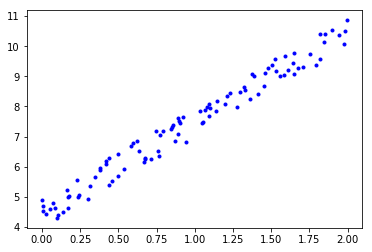

In [339]:
plt.plot(X, y, 'b.')

In [343]:
X_b = np.c_[np.ones((100,1)),X]
X_b[:5]

array([[ 1.        ,  1.89909654],
       [ 1.        ,  1.13650272],
       [ 1.        ,  0.88865476],
       [ 1.        ,  1.52371764],
       [ 1.        ,  0.34955076]])

In [344]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[ 4.50362835],
       [ 3.03754788]])

In [345]:
X_new = np.array([[0],[2]])
X_new

array([[0],
       [2]])

In [346]:
X_new_b = np.c_[np.ones((2,1)), X_new]
X_new_b

array([[ 1.,  0.],
       [ 1.,  2.]])

In [347]:
y_predict = X_new_b.dot(theta_best)
y_predict

array([[  4.50362835],
       [ 10.5787241 ]])

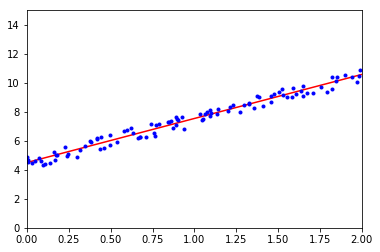

In [348]:
plt.plot(X_new, y_predict, 'r-')
plt.plot(X, y, 'b.')
plt.axis([0,2,0,15])
plt.show()

In [351]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [352]:
lin_reg.intercept_, lin_reg.coef_

(array([ 4.50362835]), array([[ 3.03754788]]))

In [353]:
lin_reg.predict(X_new)

array([[  4.50362835],
       [ 10.5787241 ]])

### Gradient Descent

* You start by filling theta with random values (random initialization), and then you improve it gradually, taking one baby step at a time, each step attempting to decrease the cost function, until the algorithm converges to a minimum
* An important parameter in GD is the size of the steps, determined by the *learning rate* hyperparameter

* The MSE cost function for a Linear Regression model is a *convex function*, there is no local minima, just one global minimum
* When using GD, you should ensure that all features have a similar scale, or else, it will take much longer to converge

#### Batch Gradient Descent

* It uses the whole training set to compute the gradients at every step.

In [354]:
eta = 0.1
n_iterations = 1000
m = 100

In [356]:
theta = np.random.randn(2,1)
theta

array([[-0.85698793],
       [-0.34433675]])

In [357]:
for iteration in range(n_iterations):
    gradients = 2/m*X_b.T.dot(X_b.dot(theta)-y)
    theta = theta - eta*gradients
    
theta

array([[ 4.50362835],
       [ 3.03754788]])

#### Stochastic Gradient Descent

* SGD just picks a random instance in the training set at every step and computes the gradients based only on that single instance
* Once the algorithm stops, the final parameter values are good, but not optimal
* When the cost function is very irregular, SGD can help the algorithm jump out of local minima, so SGD has a better chance of finding the global minimum than Batch Gradient Descent does
* Gradually reduce the learning rate is preferred

In [360]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(n_iter=50, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

/home/ruidong/Tools/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:73: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.1,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=50, n_iter=None, penalty=None,
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)

In [361]:
sgd_reg.intercept_, sgd_reg.coef_

(array([ 4.4966684]), array([ 3.03803135]))

#### Mini-batch Gradient Descent

* Mini-batch GD computes the gradients on small random sets of instances called mini-batches

In [ ]:
### Polynomial Regression

* Add powers of each feature as new features, then train a linear model on this extended set of features

In [363]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [367]:
X[:5]

array([[ 1.89909654],
       [ 1.13650272],
       [ 0.88865476],
       [ 1.52371764],
       [ 0.34955076]])

In [368]:
X_poly[:5]

array([[ 1.89909654,  3.60656768],
       [ 1.13650272,  1.29163843],
       [ 0.88865476,  0.78970728],
       [ 1.52371764,  2.32171545],
       [ 0.34955076,  0.12218573]])

In [369]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([ 4.43456865]), array([[ 3.26200373, -0.11620762]]))

* High-degree Polynomial Regression model may be severely overfitting the data, while the linear model may be underfitting it
    - One way is to use cross-validation to get an estimate of a model's generalization performance
    - Another way is to look at the learning curves: plots ofthe model's performance on the training set and the validation set as a function of the training set size
    
    - Underfitting, use a more complex model or come up with better features
    - Overfitting, add more data until the validation error reaches the training error

#### The Bias/Variance tradeoff
* Bias, Variance, Irreducible error
* Increasing a model's complexity will typically increase its variance and reduce its bias

## Regularized Linear Models

* A good way to reduce overfitting is to regularize the model (i.e., to contrain it)
* For a linear model, regularization is typically achieved by constraining the weights of the model
* It is important to scale the data. This is true of most regularized models


    * Ridge Regression
    * Lasso Regression
    * Elastic Net

### Ridge Regression (l2)

* Add a regularization term (l2 norm, square) to the cost function (MSE + alpha X 1/2 X ttt^2)
* alpha controls how much you want to regularize the model. If alpha=0, RR is just Linear Regression

* Ridge Regression has a closed-form solution by Andre-Louis Cholesky

In [371]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1,solver='cholesky')
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[ 9.01177134]])

In [372]:
sgd_reg = SGDRegressor(penalty='l2', alpha=1)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

/home/ruidong/Tools/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


array([ 7.19510439])

### Lasso Regression (l1)

* It uses the l1 norm (absolute) of the weight vector instead of half the square of the l2 norm
* It tends to completely eliminate the weights of the least important features, so it automatically performs feature selection

In [373]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])

array([ 8.89664779])

### Elastic Net

* Elastic Net is a middle ground between RR and Lasso
* The regularization term is a simply mix of l1 and l2
* You can control the mix ratio *r*. When *r*=0, it is equivalent to RR, when *r*=1, it's equivalent to Lasso

* It is almost always preferable to have at least a little bit of regularization
* Generally you should avoid plain Linear Regression
* Ridge is a good default, but if only a few features are actually useful, you should prefer Lasso or Elastic Net
* Elastic Net is preferred over Lasso
* Lasso may behave erratically when the number of features is greater than the number of training instances or when several features are strongly correlated.

In [374]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X,y)
elastic_net.predict([[1.5]])

array([ 8.77275385])

### Early stopping

* A very different way to regularize iterative learning algorithms such as GD is to stop training as soon as the validation error reaches a minimum

## Logistic Regression

* Commonly used to estimate the probability that an instance belongs to a particular class
* There is no known closed-form equation to comppute the value of theta that minimizes the cost function
* The cost function is convex, so GD is guaranteed to find the global minimum (if the learning rate is not too large and you wait long enough)


* Logistic Regression can be regularized using l1 or l2 penalties, Scikit-Learn actually adds an l2 penalty by default
* The hyperparameter controlling the regularization strength of LogisticRegression model is not alpha, but its inverse **C**

### Decision Boundaries

* Where both probabilities are equal to 50%

In [375]:
from sklearn import datasets
iris = datasets.load_iris()

In [376]:
list(iris.keys())

['DESCR', 'feature_names', 'data', 'target_names', 'target']

In [377]:
X = iris['data'][:,3:]
X

array([[ 0.2],
       [ 0.2],
       [ 0.2],
       [ 0.2],
       [ 0.2],
       [ 0.4],
       [ 0.3],
       [ 0.2],
       [ 0.2],
       [ 0.1],
       [ 0.2],
       [ 0.2],
       [ 0.1],
       [ 0.1],
       [ 0.2],
       [ 0.4],
       [ 0.4],
       [ 0.3],
       [ 0.3],
       [ 0.3],
       [ 0.2],
       [ 0.4],
       [ 0.2],
       [ 0.5],
       [ 0.2],
       [ 0.2],
       [ 0.4],
       [ 0.2],
       [ 0.2],
       [ 0.2],
       [ 0.2],
       [ 0.4],
       [ 0.1],
       [ 0.2],
       [ 0.1],
       [ 0.2],
       [ 0.2],
       [ 0.1],
       [ 0.2],
       [ 0.2],
       [ 0.3],
       [ 0.3],
       [ 0.2],
       [ 0.6],
       [ 0.4],
       [ 0.3],
       [ 0.2],
       [ 0.2],
       [ 0.2],
       [ 0.2],
       [ 1.4],
       [ 1.5],
       [ 1.5],
       [ 1.3],
       [ 1.5],
       [ 1.3],
       [ 1.6],
       [ 1. ],
       [ 1.3],
       [ 1.4],
       [ 1. ],
       [ 1.5],
       [ 1. ],
       [ 1.4],
       [ 1.3],
       [ 1.4],
       [ 1

In [378]:
y = (iris['target']==2).astype(np.int)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [379]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

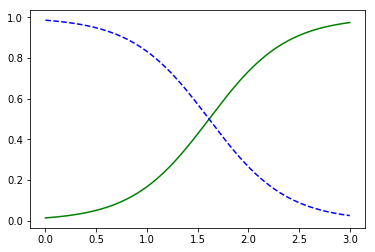

In [380]:
X_new = np.linspace(0,3,1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:,1], 'g-', label = 'Iris-Virginica')
plt.plot(X_new, y_proba[:,0], 'b--', label = 'Not Iris-Virginica')

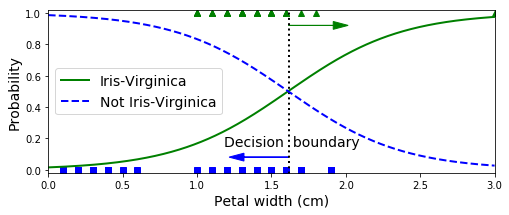

In [388]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris-Virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
plt.show()

In [381]:
log_reg.predict([[1.7],[1.5]])

array([1, 0])

### Softmax Regression

* The Logistic Regression model can be generalized to support multiple classes directly, without having to train and combine multiple binary classifiers, this is called Softmax Regression
* Softmax Regression predicts the class with the highest estimated probability
* It predicts only one class a a time, so its multiclass, not multioutput. It cannot be used to recognize multiple people in one picture

In [384]:
X = iris['data'][:,(2,3)]
y = iris['target']

softmax_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=10)
softmax_reg.fit(X, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [385]:
softmax_reg.predict([[5,2]])

array([2])

In [386]:
softmax_reg.predict_proba([[5,2]])

array([[  6.33134078e-07,   5.75276067e-02,   9.42471760e-01]])

# 4. Support Vector Machines

* A SVM is capable of performing linear or nonlinear classification, regression, and even outlier detection

## Linear SVM Classification

* You can think of an SVM classifier as fitting the widest possible street between the classes. This is called *large margin classification*


* Adding more training instances 'off the street' will not affect the decision boundary at all.


* SVMs are sensitive to the feature scales

### Soft Margin Classification

* Hard margin classification: strictly impose all instances be off the street and on the right side
    - only works if the data is linearly separable
    - quite sensitive to outliers
    
* Soft margin classification: find a good balance between keeping the street as large as possible and limiting the margin violations (in the middle of the street or even on the wrong side)
    - you can control the balance using the C hyperparameter: smaller C, wider street, more margin violations
    - if the SVM model is overfitting, you can try regularizing it by reducing C

In [338]:
from sklearn.svm import LinearSVC
# Set loss='hinge', it's not the default value
# Set dual='false', unless there are more features than training instances
svm_clf = LinearSVC(C=1, loss='hinge', dual=True)
svm_clf.fit(brca_train, brca_target_train)

LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0)

In [339]:
svm_clf.predict(brca_test)

array([1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1])

In [340]:
brca_target_test[:10]

91     0
498    0
102    1
148    1
47     0
494    1
325    1
312    1
550    1
425    1
Name: target, dtype: int64

In [341]:
#### much slower, especially with large training sets, not recommended
from sklearn.svm import SVC
svm_clf = SVC(kernel='linear', C=1)
svm_clf.fit(brca_train, brca_target_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [342]:
svm_clf.predict(brca_test)

array([1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1])

In [343]:
#### does not converge as fast as the LinearSVC, but can be useful to handle huge datasets, 
#### or to handle online classification
m = len(brca_target_train)
C = 1

svm_clf = SGDClassifier(loss='hinge', alpha=1/(m*C))
svm_clf.fit(brca_train, brca_target_train)

SGDClassifier(alpha=0.002631578947368421, average=False, class_weight=None,
       epsilon=0.1, eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

## Nonlinear SVM Classification

* Common kernels:
    - Linear
    - Polynomial
    - Gaussian RBF
    - Sigmoid

In [344]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
polynomial_svm_clf = Pipeline([
    ('poly_features', PolynomialFeatures(degree=3)),
    ('scaler', StandardScaler()),
    ('svm_clf', LinearSVC(C=10, loss='hinge'))
])

### Polynomial Kernel

* You can add many polynomial features, even with very large degree polynomials, without actually having to add them

* If your model is overfitting, you might want to reduce the polynomial degree
* coef0 controls how much the model is infuenced by high-degree polynomials versus low-degree polynomials


* You can perform a grid search to find the best hyperparameter values

In [ ]:
svm_clf = SVC(kernel='poly', degree=3, coef0=1, C=5)

### Adding Similarity Features

* Gaussian Radial Basis Function (RBF)
* How to create the landmark ?

In [ ]:
svm_clf = SVC(kernel='rbf', gamma=5, C=0.001)

### Other kernels

* Other kernels exist but are used much more rarely
* **string kernels** are sometimes used when classifying text documents or DNA sequences
* sigmoid kernel

## SVM Regression

* SVM Regression tries to fit as many instances as possible on the street while limiting margin violations
* The width of the street is controlled by a *epsilon*

In [ ]:
from sklearn.svm import LinearSVR
svm_reg = LinearSVR(epsilon=1.5)
svm_reg.fit(X, y)

In [ ]:
from sklearn.svm import SVR
svm_poly_reg = SVR(kernel='poly', degree=2, C=100, epsilon=0.1)
svm_poly_reg.fit(X,y)

# 5. Decision Trees

* Decision Trees are also versatile that can perform both classification and regression tasks, and even multioutput tasks
* Decision Trees are the fundamental components of Random Forests


* Require very little data preparation. In particular, they don't require feature scaling or centering at all

## Training and visualizing a decision tree

In [410]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [412]:
from sklearn.tree import export_graphviz

export_graphviz(
        tree_clf,
        out_file="iris_tree.dot",
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

In [ ]:
#dot -Tpng iris_tree.dot -o iris_tree.png

In [413]:
tree_clf.predict_proba([[5,1.5]])

array([[ 0.        ,  0.90740741,  0.09259259]])

In [414]:
tree_clf.predict([[5,1.5]])

array([1])

* Gini impurity
* Entropy impurity


* Most of the time it doesn't make a big difference
* Gini impurity is slightly faster, so it's a good default
* When they differ, Gini impurity tends to isolate the most frequent class in its own branch of the tree, while entropy tends to produce slightly more balanced trees

## The CART Training Algorithm

* CART: Classification And Regression Tree
    - Produces only binay tree, nonleaf nodes always have two children
    - first splits the training set into two subsets using a single feature k and a threshold tk (that produces the purest subsets
    - then it split the subsets using the same logic, and so on, recursively
    - it stops recursing once it reaches the maximum depth, or if it cannot find a split that will reduce impurity
    
 
* ID3 can produce trees with nodes that have more than two children

## Regularization

* Decision trees are nonparametric, becuase the number of parameters is not determined prior to training
* Reducing max_depth will regularize the model and thus reduce the risk of overfitting
* Other parameters: mini_samples_split, min_samples_leaf, ...

## Regression

* The prediction is simply the average target value of the training instances associated to the leaf node
* The CART algorithm tries to split the training set in a way that minimizes the MSE

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=2)
tree_reg.fit(X, y)

## Instability

* Decision trees love orthogonal decision boundaries, which makes them sensitive to training set rotation
    - One way to limit this problem is to use PCA, which often results in a better orientation of the training data
* They are very sensitive to small variations in the training data


* Random Forests can limit this instability by averaging predictions over many trees

# 6. Ensemble Learning and Random Forests

* If you aggregate the predictions of a group of predictors, you will often get better predictions than with the best individual predictor

* Ensemble methods work best when the predictors are as independent from one another as possible


* Popular Ensemble methods:
    - bagging
    - boosting
    - stacking

## Voting Classifiers

* Hard voting classifier: aggregate the predictions of each classifier and predict the class that gets the most votes
* Soft voting classifier: estimate class probabilities (i.e., use the predict_proba() method), then predict the class with the highest class probability, averaged over all the individual classifiers
    - need to set probability=True for SVC

In [345]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC()

voting_clf = VotingClassifier(
    estimators = [('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='hard'
)

In [346]:
from sklearn.metrics import accuracy_score
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(brca_train, brca_target_train)
    y_pred = clf.predict(brca_test)
    
    print (clf.__class__.__name__, accuracy_score(brca_target_test, y_pred))

LogisticRegression 0.9629629629629629
RandomForestClassifier 0.9417989417989417
SVC 0.9629629629629629
VotingClassifier 0.9682539682539683


## Bagging and Pasting

* Use the same training algorithm for every predictor, but to train them on different random subsets of the training set
    - bagging: with replacement for each predictor
    - pasting: without replacement
    
    
     (in statistics, resampling with replacement is also called bootsraping)

In [347]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500,
    max_samples=100, bootstrap=True, n_jobs=-1
)

bag_clf.fit(brca_train, brca_target_train)


BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=100, n_estimators=500, n_jobs=-1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

* Since a predictor never sees the oob instances (out-of_bag), you can set oob_score=True to request an automatic oob evaluation after training

In [348]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500,
    max_samples=100, bootstrap=True, n_jobs=-1, oob_score=True
)

bag_clf.fit(brca_train, brca_target_train)
bag_clf.oob_score_  # accuracy

0.9605263157894737

In [349]:
bag_clf.oob_decision_function_ # negative, positive

array([[0.00522193, 0.99477807],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.99484536, 0.00515464],
       [0.0132626 , 0.9867374 ],
       [0.98933333, 0.01066667],
       [0.99226804, 0.00773196],
       [1.        , 0.        ],
       [0.80417755, 0.19582245],
       [1.        , 0.        ],
       [0.01010101, 0.98989899],
       [0.06666667, 0.93333333],
       [1.        , 0.        ],
       [0.54666667, 0.45333333],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.01061008, 0.98938992],
       [0.03485255, 0.96514745],
       [0.99736148, 0.00263852],
       [0.00252525, 0.99747475],
       [0.        , 1.        ],
       [0.99742268, 0.00257732],
       [0.01822917, 0.98177083],
       [0.00258398, 0.99741602],
       [0.09560724, 0.90439276],
       [0.1684492 , 0.8315508 ],
       [1.        , 0.        ],
       [0.90932642, 0.09067358],
       [0.

* BaggingClassifier class supports sampling the features as well
    - max_features
    - bootstrap_features

## Random Forests

* With a few exceptions, a RandomForestClassifier has all the hperparameters of a DecisionTreeClassifier, plus all the hyperparameters of a BaggingClassifier to control the ensemble itself

* The Random Forrest algorithm introduces extra randomness when growing trees
    - It searches for the best feature among a random subset of features, resulting in a greater tree diversity

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rdn_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)

### Extra-Trees

* ExtraTreesClassifier
* make trees even more random by also using random thresholds for each feature rather than searching for the best possible thresholds - Extremely Randomized Trees ensemble

### Feature importance

In [352]:
#from sklearn.datasets import load_breast_cancer
#bc = load_breast_cancer()

rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1)
rnd_clf.fit(brca_train, brca_target_train)

for name, score in zip(num_attribs, rnd_clf.feature_importances_):
    print (name, score)

mean radius 0.038329628902469125
mean texture 0.01179828665100107
mean perimeter 0.05984169906157197
mean area 0.05023119501161449
mean smoothness 0.005007247952888932
mean compactness 0.013161429242255641
mean concavity 0.0392331532610839
mean concave points 0.08081276456078394
mean symmetry 0.002763121306010764
mean fractal dimension 0.0024599270463784885
radius error 0.011617195507880053
texture error 0.002910967209549479
perimeter error 0.00954068465117333
area error 0.05826869219716184
smoothness error 0.0048804621262542825
compactness error 0.003093447297773428
concavity error 0.005808512721602941
concave points error 0.003163685708429792
symmetry error 0.003055869158099109
fractal dimension error 0.003171413178310943
worst radius 0.09991864671435705
worst texture 0.01638197230159765
worst perimeter 0.12640044766635083
worst area 0.11283410801857205
worst smoothness 0.009029618951607503
worst compactness 0.017350328513194062
worst concavity 0.042903804255484304
worst concave poin

## Boosting

* Boosting refers to any Ensemble method that can combine several weak learners into a strong learner
* The general idea of most boosting methods is to train predictors sequentially, each trying to correct its predecessor


* The most popular boosting methods:
    - **AdaBoost**
    - **Gradient Boost**

### AdaBoost

* pay a bit more attention to the training instances that the predecessor underfitted. This results in new predictors focusing more and more on the hard cases
* cannot be parallelized

* 1. each instace weight *w* is initially set to 1/m
* 2. a first predictor is trained and its weighted error rate *r* is computed on the training set
* 3. the predictor's weight *alpha* is then computed (the more accurate the predictor is, the higher its weight)
* 4. the instance weights are updated: the misclassified instances are boosted
* 5. a new predictor is trained using the updated weights, and the whole process is repeated
* 6. the algorithm stops when the desired number of predictors is reached, or when a perfect predictor is found


* to make predictions, AdaBoost simply computes the predictions of all the predictors and weighs them using the predictor weights *alpha*. The predicted class is the one that receives the majority of weighted votes

* Scikit-Learn actually uses a multiclass version of AdaBoost called SAMME (Stagewise Additive Modeling using a Multiclass Exponential loss function)
* When there are just two classes, SAMME is equivalent to AdaBoost

* Scikit-Learn can use a variant of SAMME called SAMME.R (R stands for Real), which relies on class probabilities rather than predictions and generally performs better

In [353]:
from sklearn.ensemble import AdaBoostClassifier
#from sklearn.ensemble import AdaBoostRegressor
ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=200,
    algorithm='SAMME.R', learning_rate=0.5
)

ada_clf.fit(brca_train, brca_target_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=0.5, n_estimators=200, random_state=None)

### Gradient Boosting

* sequentially adding predictors to an ensemble, each one correcting ist predecessor
* instead of tweaking the instance weights at every iteration, this method tries to fit the new predictor to the residual errors made by the previous predictor
* Gradient Tree Boosting, or Gradient Boosted Regression Tress (GBRT)

In [355]:
tree_reg1 = DecisionTreeRegressor(max_depth=2)
tree_reg1.fit(diab_prepared, diab_target)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [356]:
y2 = diab_target - tree_reg1.predict(diab_prepared)
tree_reg2 = DecisionTreeRegressor(max_depth=2)
tree_reg2.fit(diab_prepared,y2)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [357]:
y3 = y2 - tree_reg2.predict(diab_prepared)
tree_reg3 = DecisionTreeRegressor(max_depth=2)
tree_reg3.fit(diab_prepared,y3)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [358]:
y_pred = sum(tree.predict(diab_prepared) for tree in (tree_reg1, tree_reg2, tree_reg3))

In [367]:
y_pred

array([217.2904832 ,  87.7207951 , 217.2904832 , 154.09188806,
        87.7207951 ,  87.7207951 ,  87.7207951 , 114.67020736,
       151.15553443, 217.2904832 ,  87.7207951 , 151.15553443,
        87.7207951 , 154.09188806,  87.7207951 , 181.04130032,
       217.2904832 , 154.09188806,  87.7207951 ,  87.7207951 ,
        87.7207951 ,  87.7207951 ,  87.7207951 , 241.6809373 ,
       151.15553443, 154.09188806,  87.7207951 , 151.15553443,
       154.09188806, 181.04130032, 151.15553443,  87.7207951 ,
       264.07242649,  87.7207951 ,  87.7207951 , 154.09188806,
       217.2904832 , 154.09188806, 279.31364727, 154.09188806,
       178.48234215,  87.7207951 ,  87.7207951 , 112.11124919,
       217.2904832 ,  87.7207951 ,  87.7207951 ,  87.7207951 ,
        87.7207951 , 154.09188806,  87.7207951 , 217.2904832 ,
        87.7207951 , 114.67020736, 151.15553443,  87.7207951 ,
       217.2904832 ,  87.7207951 , 154.09188806, 154.09188806,
        87.7207951 , 154.09188806,  87.7207951 ,  87.72

In [360]:
diab_target[:10]

0    151
1     75
2    141
3    206
4    135
5     97
6    138
7     63
8    110
9    310
Name: y, dtype: int64

In [361]:
from sklearn.ensemble import GradientBoostingRegressor
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0)
gbrt.fit(diab_prepared, diab_target)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=1.0, loss='ls', max_depth=2, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=3, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

* the learning rate hyperparameter scales the contribution of each tree. If you set it to a low value, such as 0.1, you will need more trees, but the predictions will usually generalize better. This is a regularization technique called shrinkage.

#### use staged_predict to implement early stopping

In [460]:
from sklearn.metrics import mean_squared_error

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=120)
gbrt.fit(diab_prepared, diab_target)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=2, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=120, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [369]:
errors = [mean_squared_error(diab_target, pred) for pred in gbrt.staged_predict(diab_prepared)]
best_n_estimators = np.argmin(errors)
best_n_estimators

2

In [370]:
gbrt_best = GradientBoostingRegressor(max_depth=2, n_estimators=best_n_estimators)
gbrt_best.fit(diab_prepared, diab_target)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=2, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=2, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [373]:
gbrt = GradientBoostingRegressor(max_depth=2, warm_start=True)

min_val_error = float('inf')
error_going_up = 0

for n_estimators in range(1,120):
    gbrt.n_estimators = n_estimators
    gbrt.fit(diab_prepared, diab_target)
    
    pred = gbrt.predict(diab_prepared)
    val_error = mean_squared_error(diab_target, pred)
    
    if val_error < min_val_error:
        min_val_error = val_error
        error_going_up = 0
        
    else:
        error_going_up += 1
        if error_going_up == 5:
            break

In [374]:
n_estimators

119

* The GradientBoostingRegressor class also supports a subsample hyperparameter, which specifies the fraction of training instances to be used for training each tree.
* This technique is called Stochastic Gradient Boosting, which can speed up training considerably

### Stacking

* Instead of using trivial functions (such as hard voting) to aggregate the predictions of all predictors in an ensemble, stacking genralization train a model to perform this aggregation


* first, the training set is split in two subsets. the first subset is used to train the n predictors in the first layer
* next, the first layer predictors are used to make predictions on the second set (n values for each instance)
* we can create a new training set using these predicted values as input features (the new training set is n-dimensional)
* the blender is trained on this new training set, so it learns to predict the target value given the first layer's predictions


* scikit-learn does not support stacking directly, you can use an open source implementation such as *brew*

# 7. Dimensionality Reduction

* Reducing dimensionality does lose some information, even though it will speed up training, it may also make your systerm perform slightly worse
* Try to train your system with the original data before considering using dimensionality reduction
* However, it may filter out some noise and unnecessary details and thus result in higher perfromance (in general it won't, it will just speed up training)


* Dimensionality reduction is also extremely useful for data visualization

* Two main appraoches to dimensionality reduction:
    - projection
    - manifold learning
    
  
* Three most popular techniques:
    - PCA
    - Kernel PCA
    - LLE (Locally Linear Embedding)

* The more dimensions the training set has, the greater the risk of overfitting it

## Main Approaches

### Projection

* In most real-world problems, training instances are not spread out uniformly across all dimensions. Many features are almost constant, while others are highly correlated
* All training instances actually lie within or close to a much lower-dimensional subspace of the high-dimensional space

### Manifold

* Manifold assumpution, or manifold hypothesis: most real-world high-dimensional datasets lie close to a much lower-dimensional manifold

## PCA

* First it identifies the hyperplane that lies closest to the data, and then it projects the data onto it

### Preserving the variance

* select the axis that perserves the maximum amount of variance, as it will most likely lose less infromation than the other projections
* the axis that minimizes the mean squared distance between the original dataset and its projection onto that axis

### Principal Components

* PCA identifies the axis that accounts for the largest amount of variance
* the second axis, orthogonal to the first one, accounts for the largest amount of remaining variance
* the third axis, orthogonal to both previous axes, and so on

* There is a standard matrix factorization techinique called **Singular Value Decomposition (SVD)** that can decompose the training set matrix into the dot product of three matrices, and one of them contains all the principal components
* PCA assues that the dataset is centered around the origin. If you implement PCA yourself, don't forget to center the data first

In [375]:
X = brca_prepared
y = brca_target

In [376]:
### the first two components
X_centered = X - X.mean(axis=0) # average on each feature
U, s, Vt = np.linalg.svd(X_centered)
c1 = Vt.T[:,0]
c2 = Vt.T[:,1]
c1

array([-0.21890244, -0.10372458, -0.22753729, -0.22099499, -0.14258969,
       -0.23928535, -0.25840048, -0.26085376, -0.13816696, -0.06436335,
       -0.20597878, -0.01742803, -0.21132592, -0.20286964, -0.01453145,
       -0.17039345, -0.15358979, -0.1834174 , -0.04249842, -0.10256832,
       -0.22799663, -0.10446933, -0.23663968, -0.22487053, -0.12795256,
       -0.21009588, -0.22876753, -0.25088597, -0.12290456, -0.13178394])

### Projecting down to d dimensions

In [378]:
### project the training set onto the plane defined by the first two PCs
W2 = Vt.T[:,:2]
X2D = X_centered.dot(W2)
X2D

array([[ -9.19283683,  -1.94858307],
       [ -2.3878018 ,   3.76817174],
       [ -5.73389628,   1.0751738 ],
       ...,
       [ -1.25617928,   1.90229671],
       [-10.37479406,  -1.67201011],
       [  5.4752433 ,   0.67063679]])

In [379]:
### automatically takes care of centering the data
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X2D = pca.fit_transform(X)
X2D

array([[ 9.19283683,  1.94858307],
       [ 2.3878018 , -3.76817174],
       [ 5.73389628, -1.0751738 ],
       ...,
       [ 1.25617928, -1.90229671],
       [10.37479406,  1.67201011],
       [-5.4752433 , -0.67063679]])

In [380]:
### the first PC
pca.components_.T[:,0]

array([0.21890244, 0.10372458, 0.22753729, 0.22099499, 0.14258969,
       0.23928535, 0.25840048, 0.26085376, 0.13816696, 0.06436335,
       0.20597878, 0.01742803, 0.21132592, 0.20286964, 0.01453145,
       0.17039345, 0.15358979, 0.1834174 , 0.04249842, 0.10256832,
       0.22799663, 0.10446933, 0.23663968, 0.22487053, 0.12795256,
       0.21009588, 0.22876753, 0.25088597, 0.12290456, 0.13178394])

In [381]:
pca.explained_variance_ratio_

array([0.44272026, 0.18971182])

### Choosing the right number of dimensions

* choose the number of dimensions that add up to a sufficiently large portion of the variance (e.g., 95%)

In [382]:
pca = PCA()
pca.fit(X)

cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
d

10

In [383]:
pca = PCA(n_components=d)

In [384]:
### alternatively
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X)
X_reduced

array([[ 9.19283683,  1.94858307, -1.12316616, ..., -0.39840723,
        -0.15711836, -0.87740188],
       [ 2.3878018 , -3.76817174, -0.52929269, ...,  0.24098846,
        -0.71190482,  1.10699494],
       [ 5.73389628, -1.0751738 , -0.55174759, ...,  0.09737374,
         0.02406564,  0.4542754 ],
       ...,
       [ 1.25617928, -1.90229671,  0.56273053, ...,  0.34188704,
         0.39391682,  0.52087738],
       [10.37479406,  1.67201011, -1.87702933, ..., -0.28023861,
        -0.54203454, -0.08929612],
       [-5.4752433 , -0.67063679,  1.49044308, ...,  1.04635352,
         0.37410111, -0.04772557]])

### PCA for Compression

In [385]:
### PCA inverse transformation, back to the original number of dimensions
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X)
X_recovered = pca.inverse_transform(X_reduced)
X_recovered

array([[ 1.38427886, -1.66948723,  1.53479934, ...,  2.11751042,
         2.46071722,  2.30316082],
       [ 1.73984523, -0.04943395,  1.67864389, ...,  0.61424625,
        -0.29985572, -0.50325562],
       [ 1.67272614,  0.18190073,  1.69074544, ...,  1.59785176,
         1.00496177,  0.21447697],
       ...,
       [ 0.67013111,  1.68013758,  0.63314931, ...,  0.32130226,
        -0.81009853, -0.21643888],
       [ 1.89469068,  2.14264956,  2.02126536, ...,  2.82239973,
         2.29814156,  2.53897802],
       [-1.43293227,  1.09867698, -1.49269088, ..., -1.9907028 ,
        -0.00377997, -0.58690401]])

### Incremental PCA (IPCA)

* IPCA: split the training set into mini-batches and feed an IPCA algorithm one mini-batch at a time
* This is useful for large training sets, and also to apply to PCA online

In [386]:
from sklearn.decomposition import IncrementalPCA
n_batches = 100
inc_pca = IncrementalPCA(n_components=3)

for X_batch in np.array_split(X, n_batches):
    inc_pca.partial_fit(X_batch)
    
X_reduced = inc_pca.transform(X)
X_reduced

array([[ 9.20699377,  1.91920023, -0.79969088],
       [ 2.38254843, -3.76618256, -0.38317944],
       [ 5.73611778, -1.08338249, -0.45845205],
       ...,
       [ 1.24612614, -1.87274135,  0.45080202],
       [10.37685553,  1.70406476, -2.08744373],
       [-5.46587019, -0.63608941,  1.24420793]])

* use NumPy's memmap class to manipulate a large array stored in a binary file
* the class loads only the data it needs in memory, when it needs it

In [ ]:
X_mm = np.memmap(filename, dtype='float32', mode='readonly', shape=(m,n))
batch_size = m // n_batches
inc_pca = IncrementalPCA(n_components=3, batch_size=batch_size)
inc_pca.fit(X_mm)

### Randomized PCA

* a stochastic algorithm that quickly finds an approximation of the first d PCs

In [388]:
rnd_pca = PCA(n_components=3, svd_solver='randomized')
X_reduced = rnd_pca.fit_transform(X)
X_reduced

array([[ 9.19283681,  1.94858238, -1.12316063],
       [ 2.38780177, -3.76817258, -0.52928663],
       [ 5.73389627, -1.07517399, -0.55174644],
       ...,
       [ 1.25617928, -1.90229654,  0.5627292 ],
       [10.37479408,  1.67201089, -1.87703535],
       [-5.47524335, -0.67063842,  1.49045477]])

## Kernel PCA

* perform complex nonlinear projections for dimensionality reduction

In [389]:
from sklearn.decomposition import KernelPCA
rbf_pca = KernelPCA(n_components=3, kernel='rbf', gamma=0.04)
X_reduced = rbf_pca.fit_transform(X)
X_reduced

array([[-0.33360747,  0.16081078,  0.25625863],
       [-0.41445146, -0.38398467,  0.08382276],
       [-0.65601677, -0.10769923,  0.1430453 ],
       ...,
       [-0.25322458, -0.31121758, -0.01229401],
       [-0.35195333,  0.16535595,  0.27163719],
       [ 0.08996694,  0.15864298,  0.43194717]])

### Selecting a kernel and tuning hyperparameters

* use grid search to select the kernel and hyperparameters that lead to the best performance on the task

In [391]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

clf = Pipeline([
    ('kpca', KernelPCA(n_components=3)),
    ('log_reg', LogisticRegression())
])

param_grid = [{
    'kpca__gamma': np.linspace(0.03,0.05,10),
    'kpca__kernel': ['rbf', 'sigmoid']
}]

grid_search = GridSearchCV(clf, param_grid, cv=10)
grid_search.fit(brca_prepared,brca_target)

grid_search.best_params_

{'kpca__gamma': 0.03888888888888889, 'kpca__kernel': 'sigmoid'}

* select the kernel and hyperparameters that yield the lowest reconstruction error

In [392]:
rbf_pca = KernelPCA(n_components=3, kernel='rbf', gamma=0.04, fit_inverse_transform=True)
X_reduced = rbf_pca.fit_transform(X)
X_preimage = rbf_pca.inverse_transform(X_reduced)
X_preimage

array([[ 0.41323527,  0.4926864 ,  0.44219149, ...,  0.44392141,
         0.20947128,  0.36488701],
       [ 1.23334703,  0.50399655,  1.21347032, ...,  0.94005756,
         0.19872216, -0.00396074],
       [ 1.24398475,  0.7567376 ,  1.26564029, ...,  1.24126122,
         0.48342869,  0.52250782],
       ...,
       [ 0.83479149,  0.27705971,  0.81646556, ...,  0.64354119,
         0.13380452, -0.03548529],
       [ 0.44301207,  0.52029405,  0.47305414, ...,  0.47013998,
         0.21894235,  0.37934466],
       [-0.16742808,  0.17715394, -0.16858134, ..., -0.45573563,
        -0.29151415, -0.25556903]])

In [393]:
from sklearn.metrics import mean_squared_error
mean_squared_error(X, X_preimage)

0.5604817718700229

## LLE

* LLE is another powerful non-linear dimensionality reduction (NLDR) technique
* LLE is a manifold learning technique that does not rely on projections


* first measures how each training instance linearly relates to its closest neighbors
* then looks for a low-dimensional representation where these local relationships are best preserved


* first, for each training instance x(i), the algorithm identifies its k closest neighbors
* then, reconstruct x(i) as a linear function of these neighbors (find the weights such that the squared distance between x(i) and the reconstruced x(i) as small as possible
* ...

In [394]:
from sklearn.manifold import LocallyLinearEmbedding
lle = LocallyLinearEmbedding(n_components=3, n_neighbors=10)
X_reduced = lle.fit_transform(X)
X_reduced

array([[-0.05363029, -0.04909902,  0.05062417],
       [ 0.01772348,  0.01591739,  0.03865664],
       [ 0.02187666, -0.01694689,  0.03512353],
       ...,
       [ 0.00619051, -0.00860483,  0.00970245],
       [ 0.12588529, -0.07263089,  0.06143317],
       [-0.02957292,  0.00669037, -0.02862437]])

## Other Dimensionality Reduction Techniques

* MDS (Multidimensional Scaling)
    - preserve the distances between the instances
* Isomap
    - creates a graph by connecting each instance to its nearest neighbors, then reduces dimensionality while trying to preserve the geodesic distances between the instances
* t-Distributed Stochastic Neighbor Embedding (t-SNE)
    - keep similar instances close and dissimilar instances apart
    
* LDA (Linear Discriminant Analysis)
    - is actually a classification algorithm. it learns the most discriminative axes between the classes and these axes can be used to define a hyperplane onto which to project the data
    - LDA is a good technique to reduce dimensionality before running another classification algorithm such as an SVM calassifier

In [219]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

#reg = LinearRegression()
reg1 = Ridge()
reg2 = Lasso()
reg3 = ElasticNet()

reg4 = DecisionTreeRegressor()
reg5 = RandomForestRegressor()

reg6 = SVR(kernel='linear')
reg7 = SVR(kernel='poly')
reg8 = SVR(kernel='rbf')


for reg in [reg1, reg2, reg3, reg4, reg5, reg6, reg7, reg8]:
    reg.fit(train_rna, train_phe['pfr_5yr'])


#reg1.fit(train_rna, train_phe['days_to_bcr'])
#reg2.fit(train_rna, train_phe['days_to_bcr'])
#reg3.fit(train_rna, train_phe['days_to_bcr'])
#reg4.fit(train_rna, train_phe['days_to_bcr'])
#reg5.fit(train_rna, train_phe['days_to_bcr'])
#reg6.fit(train_rna, train_phe['days_to_bcr'])
#reg7.fit(train_rna, train_phe['days_to_bcr'])
#reg8.fit(train_rna, train_phe['days_to_bcr'])





In [220]:
pred1 = reg1.predict(test_rna)
pred2 = reg2.predict(test_rna)
pred3 = reg3.predict(test_rna)
pred4 = reg4.predict(test_rna)

pred5 = reg5.predict(test_rna)
pred6 = reg6.predict(test_rna)
pred7 = reg7.predict(test_rna)
pred8 = reg8.predict(test_rna)

In [221]:
pred1

array([ 0.89027894,  0.64822867,  1.00975659,  0.75285913,  0.58764906,
        0.3618995 ,  0.39999328,  0.54240867,  0.60123393,  0.5938065 ,
        0.71961885,  0.32653646,  0.51394072,  0.25559847,  0.54171278,
        0.70167163,  0.70416984,  0.81252445,  0.75275755,  0.71965693,
        0.7115397 ,  0.51382902,  0.74487979,  0.88976512,  0.90919284,
        0.91509709,  0.59421196,  0.64206744,  0.67705221,  0.7969416 ,
        0.70583098,  0.68802893,  0.87445826,  0.82813463,  0.58873428,
        0.74138246,  0.47511125,  0.63659552,  0.46592303,  0.73745846,
        0.70073506,  0.56893076,  0.58362455,  0.74994352,  0.89045282,
        0.53548781,  0.53775182,  0.5018297 ,  0.85033154,  0.41982275,
        0.9118066 ,  0.39995211,  0.83874148,  0.69279002,  0.91159581,
        0.42644099,  0.56714381,  0.50222749,  0.57484237,  0.83391397,
        0.88270647,  0.65223861,  0.55643928,  0.63488747,  0.62630003,
        0.70662823,  0.59991085,  0.65444037,  0.81283667,  0.12

In [222]:
pred2

array([ 0.64563158,  0.64563158,  0.64563158,  0.64563158,  0.64563158,
        0.64563158,  0.64563158,  0.64563158,  0.64563158,  0.64563158,
        0.64563158,  0.64563158,  0.64563158,  0.64563158,  0.64563158,
        0.64563158,  0.64563158,  0.64563158,  0.64563158,  0.64563158,
        0.64563158,  0.64563158,  0.64563158,  0.64563158,  0.64563158,
        0.64563158,  0.64563158,  0.64563158,  0.64563158,  0.64563158,
        0.64563158,  0.64563158,  0.64563158,  0.64563158,  0.64563158,
        0.64563158,  0.64563158,  0.64563158,  0.64563158,  0.64563158,
        0.64563158,  0.64563158,  0.64563158,  0.64563158,  0.64563158,
        0.64563158,  0.64563158,  0.64563158,  0.64563158,  0.64563158,
        0.64563158,  0.64563158,  0.64563158,  0.64563158,  0.64563158,
        0.64563158,  0.64563158,  0.64563158,  0.64563158,  0.64563158,
        0.64563158,  0.64563158,  0.64563158,  0.64563158,  0.64563158,
        0.64563158,  0.64563158,  0.64563158,  0.64563158,  0.64

In [223]:
x = test_phe['pfr_5yr']

In [224]:
cor = []

for y in [pred1, pred2, pred3, pred4, pred5, pred6, pred7, pred8]:
    cor.append(round(np.corrcoef(x=x, y=y)[0][1],3))
    
print (cor)

[0.39600000000000002, 0.0, 0.0, 0.313, 0.33600000000000002, 0.42799999999999999, 0.29099999999999998, 0.45100000000000001]


In [225]:
cor = list(map(str, cor))
cor

['0.396', '0.0', '0.0', '0.313', '0.336', '0.428', '0.291', '0.451']

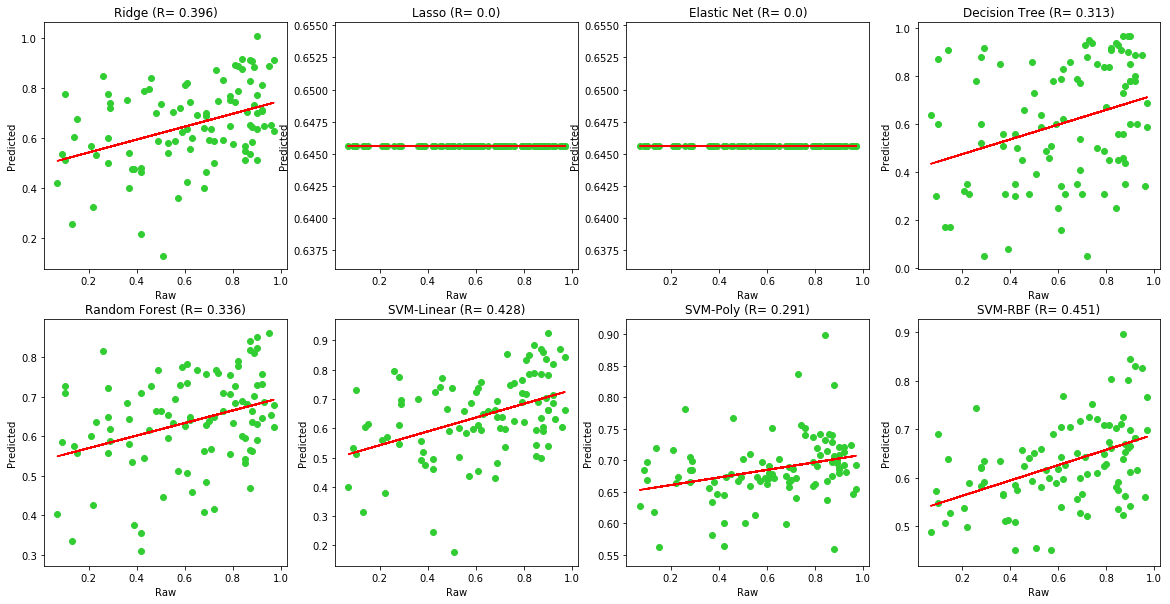

In [226]:

x = test_phe['pfr_5yr']

plt.figure(figsize=(20,10))

###
plt.subplot(2, 4, 1)
plt.scatter(x=x, y=pred1, color='limegreen')
plt.title('Ridge' + ' (R= ' + cor[0] + ')')
plt.xlabel('Raw')
plt.ylabel('Predicted')

z = np.polyfit(x, pred1, 1)
p = np.poly1d(z)
plt.plot(x,p(x), 'b', color='red') # r--

###
plt.subplot(2, 4, 2)
plt.scatter(x=x, y=pred2, color='limegreen')
plt.title('Lasso' + ' (R= ' + cor[1] + ')')
plt.xlabel('Raw')
plt.ylabel('Predicted')

z = np.polyfit(x, pred2, 1)
p = np.poly1d(z)
plt.plot(x,p(x), 'b', color='red') # r--


###
plt.subplot(2, 4, 3)
plt.scatter(x=x, y=pred3, color='limegreen')
plt.title('Elastic Net' + ' (R= ' + cor[2] + ')')
plt.xlabel('Raw')
plt.ylabel('Predicted')

z = np.polyfit(x, pred3, 1)
p = np.poly1d(z)
plt.plot(x,p(x), 'b', color='red') # r--


###
plt.subplot(2, 4, 4)
plt.scatter(x=x, y=pred4, color='limegreen')
plt.title('Decision Tree' + ' (R= ' + cor[3] + ')')
plt.xlabel('Raw')
plt.ylabel('Predicted')

z = np.polyfit(x, pred4, 1)
p = np.poly1d(z)
plt.plot(x,p(x), 'b', color='red') # r--


###
plt.subplot(2, 4, 5)
plt.scatter(x=x, y=pred5, color='limegreen')
plt.title('Random Forest' + ' (R= ' + cor[4] + ')')
plt.xlabel('Raw')
plt.ylabel('Predicted')

z = np.polyfit(x, pred5, 1)
p = np.poly1d(z)
plt.plot(x,p(x), 'b', color='red') # r--


###
plt.subplot(2, 4, 6)
plt.scatter(x=x, y=pred6, color='limegreen')
plt.title('SVM-Linear' + ' (R= ' + cor[5] + ')')
plt.xlabel('Raw')
plt.ylabel('Predicted')

z = np.polyfit(x, pred6, 1)
p = np.poly1d(z)
plt.plot(x,p(x), 'b', color='red') # r--


###
plt.subplot(2, 4, 7)
plt.scatter(x=x, y=pred7, color='limegreen')
plt.title('SVM-Poly' + ' (R= ' + cor[6] + ')')
plt.xlabel('Raw')
plt.ylabel('Predicted')

z = np.polyfit(x, pred7, 1)
p = np.poly1d(z)
plt.plot(x,p(x), 'b', color='red') # r--



###
plt.subplot(2, 4, 8)
plt.scatter(x=x, y=pred8, color='limegreen')
plt.title('SVM-RBF' + ' (R= ' + cor[7] + ')')
plt.xlabel('Raw')
plt.ylabel('Predicted')

z = np.polyfit(x, pred8, 1)
p = np.poly1d(z)
plt.plot(x,p(x), 'b', color='red') # r--



In [ ]:
********************************************************************************************************

In [338]:
from sklearn.linear_model import SGDClassifier

clf = SGDClassifier(random_state=36)

clf.fit(train_rna, train_phe['bcr_status'])

/home/ruidong/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=36, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [339]:
clf.predict(test_rna)

array([0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0])

In [340]:
test_phe['bcr_status'].values

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0])

In [341]:
y_scores = clf.decision_function(test_rna)
y_scores

array([ -4168.76431541,   1735.30507972,  -6608.70963006,  -2748.15786254,
        -4391.6120146 ,  -3072.84394648,   2942.74007006,  -2431.85168727,
         1613.68958206,   3540.12047581,   2957.57082834,   6944.95693698,
          317.94568635,   4783.91817245,   1240.94747413,  -1982.11631195,
         1984.45605512,   4940.57257742,  -2444.52767455,  -6518.73108567,
         2110.55225612,  -2170.58358542,  -4926.8654381 ,   1689.78356621,
        -5154.8258624 ,   2753.79410105,  -8992.82637175,  -1044.46144387,
         2862.70193009,  12371.97007456,   1865.01444102,  10259.07391798,
        -1777.19575521,  -2711.31564535,  -2818.79265097,  -1077.51782563,
        -2691.32360758,  -4913.45959015,  -5653.73173798,  -7509.00234626,
          340.58265787,   6815.76665755,   6641.04137255,  -4932.86510064,
        -7017.97161476,   -698.18375609,   -646.11826119,  -8895.44264403,
        -6002.22551924,  -5556.38048148, -10294.76541289])

In [342]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(test_phe['bcr_status'], y_scores)

from sklearn.metrics import roc_auc_score
auc = round(roc_auc_score(test_phe['bcr_status'], y_scores),3)
auc

0.831

In [343]:
fpr

array([0.        , 0.        , 0.03571429, 0.03571429, 0.07142857,
       0.07142857, 0.10714286, 0.10714286, 0.17857143, 0.17857143,
       0.21428571, 0.21428571, 0.39285714, 0.39285714, 0.57142857,
       0.57142857, 0.71428571, 0.71428571, 0.78571429, 0.78571429,
       1.        ])

In [344]:
tpr

array([0.04347826, 0.17391304, 0.17391304, 0.43478261, 0.43478261,
       0.60869565, 0.60869565, 0.65217391, 0.65217391, 0.69565217,
       0.69565217, 0.82608696, 0.82608696, 0.86956522, 0.86956522,
       0.91304348, 0.91304348, 0.95652174, 0.95652174, 1.        ,
       1.        ])

In [345]:
thresholds

array([ 12371.97007456,   6815.76665755,   6641.04137255,   2862.70193009,
         2753.79410105,   1735.30507972,   1689.78356621,   1613.68958206,
          340.58265787,    317.94568635,   -646.11826119,  -1077.51782563,
        -2444.52767455,  -2691.32360758,  -4168.76431541,  -4391.6120146 ,
        -5154.8258624 ,  -5556.38048148,  -6002.22551924,  -6518.73108567,
       -10294.76541289])

In [356]:
def plot_roc_curve(fpr, tpr, label=None, title=None):
    plt.plot(fpr, tpr, linewidth=2, label=label, color='red')
    plt.plot([0,1],[0,1], 'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate (1-Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.title(title)

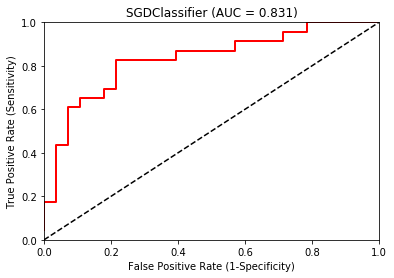

In [357]:
plot_roc_curve(fpr, tpr, title='SGDClassifier (AUC = ' + str(auc) + ')')
plt.show()

In [348]:
from sklearn.linear_model import SGDClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

#reg = LinearRegression()
reg1 = SGDClassifier(random_state=36)
reg2 = LogisticRegression()
reg3 = KNeighborsClassifier()

reg4 = DecisionTreeClassifier()
reg5 = RandomForestClassifier()

reg6 = SVC(kernel='linear')
reg7 = SVC(kernel='poly')
reg8 = SVC(kernel='rbf')


for reg in [reg1, reg2, reg3, reg4, reg5, reg6, reg7, reg8]:
    reg.fit(train_rna, train_phe['bcr_status'])


#reg1.fit(train_rna, train_phe['days_to_bcr'])
#reg2.fit(train_rna, train_phe['days_to_bcr'])
#reg3.fit(train_rna, train_phe['days_to_bcr'])
#reg4.fit(train_rna, train_phe['days_to_bcr'])
#reg5.fit(train_rna, train_phe['days_to_bcr'])
#reg6.fit(train_rna, train_phe['days_to_bcr'])
#reg7.fit(train_rna, train_phe['days_to_bcr'])
#reg8.fit(train_rna, train_phe['days_to_bcr'])

/home/ruidong/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [349]:
pred1 = reg1.predict(test_rna)
pred2 = reg2.predict(test_rna)
pred3 = reg3.predict(test_rna)
pred4 = reg4.predict(test_rna)

pred5 = reg5.predict(test_rna)
pred6 = reg6.predict(test_rna)
pred7 = reg7.predict(test_rna)
pred8 = reg8.predict(test_rna)

In [350]:
pred8

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0])

In [351]:
test_phe['bcr_status'].values

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0])

In [352]:
y_scores1 = reg1.decision_function(test_rna)
y_scores2 = reg2.decision_function(test_rna)

y_scores3 = reg3.predict_proba(test_rna)
y_scores3 = y_scores3[:,1]

y_scores4 = reg4.predict_proba(test_rna)
y_scores4 = y_scores4[:,1]

y_scores5 = reg5.predict_proba(test_rna)
y_scores5 = y_scores5[:,1]

y_scores6 = reg6.decision_function(test_rna)

y_scores7 = reg7.decision_function(test_rna)
y_scores8 = reg8.decision_function(test_rna)


In [353]:
from sklearn.metrics import roc_curve

fpr1, tpr1, thresholds1 = roc_curve(test_phe['bcr_status'], y_scores1)
fpr2, tpr2, thresholds2 = roc_curve(test_phe['bcr_status'], y_scores2)

fpr3, tpr3, thresholds3 = roc_curve(test_phe['bcr_status'], y_scores3)
fpr4, tpr4, thresholds4 = roc_curve(test_phe['bcr_status'], y_scores4)
fpr5, tpr5, thresholds5 = roc_curve(test_phe['bcr_status'], y_scores5)

fpr6, tpr6, thresholds6 = roc_curve(test_phe['bcr_status'], y_scores6)
fpr7, tpr7, thresholds7 = roc_curve(test_phe['bcr_status'], y_scores7)
fpr8, tpr8, thresholds8 = roc_curve(test_phe['bcr_status'], y_scores8)


from sklearn.metrics import roc_auc_score
auc1 = round(roc_auc_score(test_phe['bcr_status'], y_scores1),3)
auc2 = round(roc_auc_score(test_phe['bcr_status'], y_scores2),3)

auc3 = round(roc_auc_score(test_phe['bcr_status'], y_scores3),3)
auc4 = round(roc_auc_score(test_phe['bcr_status'], y_scores4),3)
auc5 = round(roc_auc_score(test_phe['bcr_status'], y_scores5),3)

auc6 = round(roc_auc_score(test_phe['bcr_status'], y_scores6),3)
auc7 = round(roc_auc_score(test_phe['bcr_status'], y_scores7),3)
auc8 = round(roc_auc_score(test_phe['bcr_status'], y_scores8),3)

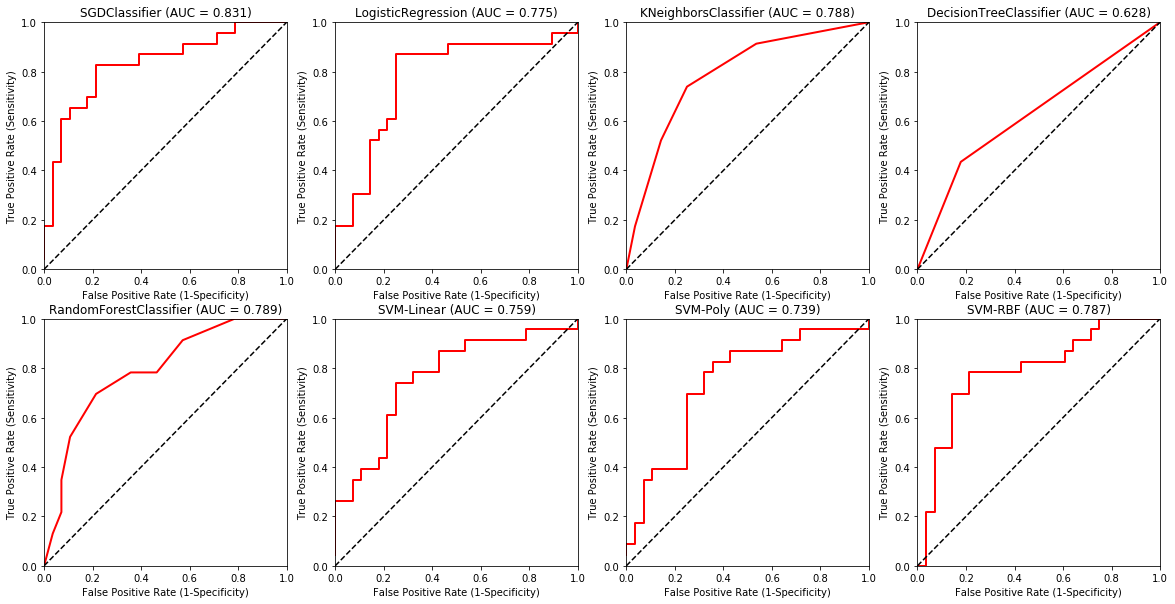

In [358]:

plt.figure(figsize=(20,10))

###
plt.subplot(2, 4, 1)
plot_roc_curve(fpr1, tpr1, title='SGDClassifier (AUC = ' + str(auc1) + ')')

plt.subplot(2, 4, 2)
plot_roc_curve(fpr2, tpr2, title='LogisticRegression (AUC = ' + str(auc2) + ')')

plt.subplot(2, 4, 3)
plot_roc_curve(fpr3, tpr3, title='KNeighborsClassifier (AUC = ' + str(auc3) + ')')

plt.subplot(2, 4, 4)
plot_roc_curve(fpr4, tpr4, title='DecisionTreeClassifier (AUC = ' + str(auc4) + ')')

plt.subplot(2, 4, 5)
plot_roc_curve(fpr5, tpr5, title='RandomForestClassifier (AUC = ' + str(auc5) + ')')

plt.subplot(2, 4, 6)
plot_roc_curve(fpr6, tpr6, title='SVM-Linear (AUC = ' + str(auc6) + ')')

plt.subplot(2, 4, 7)
plot_roc_curve(fpr7, tpr7, title='SVM-Poly (AUC = ' + str(auc7) + ')')

plt.subplot(2, 4, 8)
plot_roc_curve(fpr8, tpr8, title='SVM-RBF (AUC = ' + str(auc8) + ')')


plt.show()
